# Prévision des ventes en détail

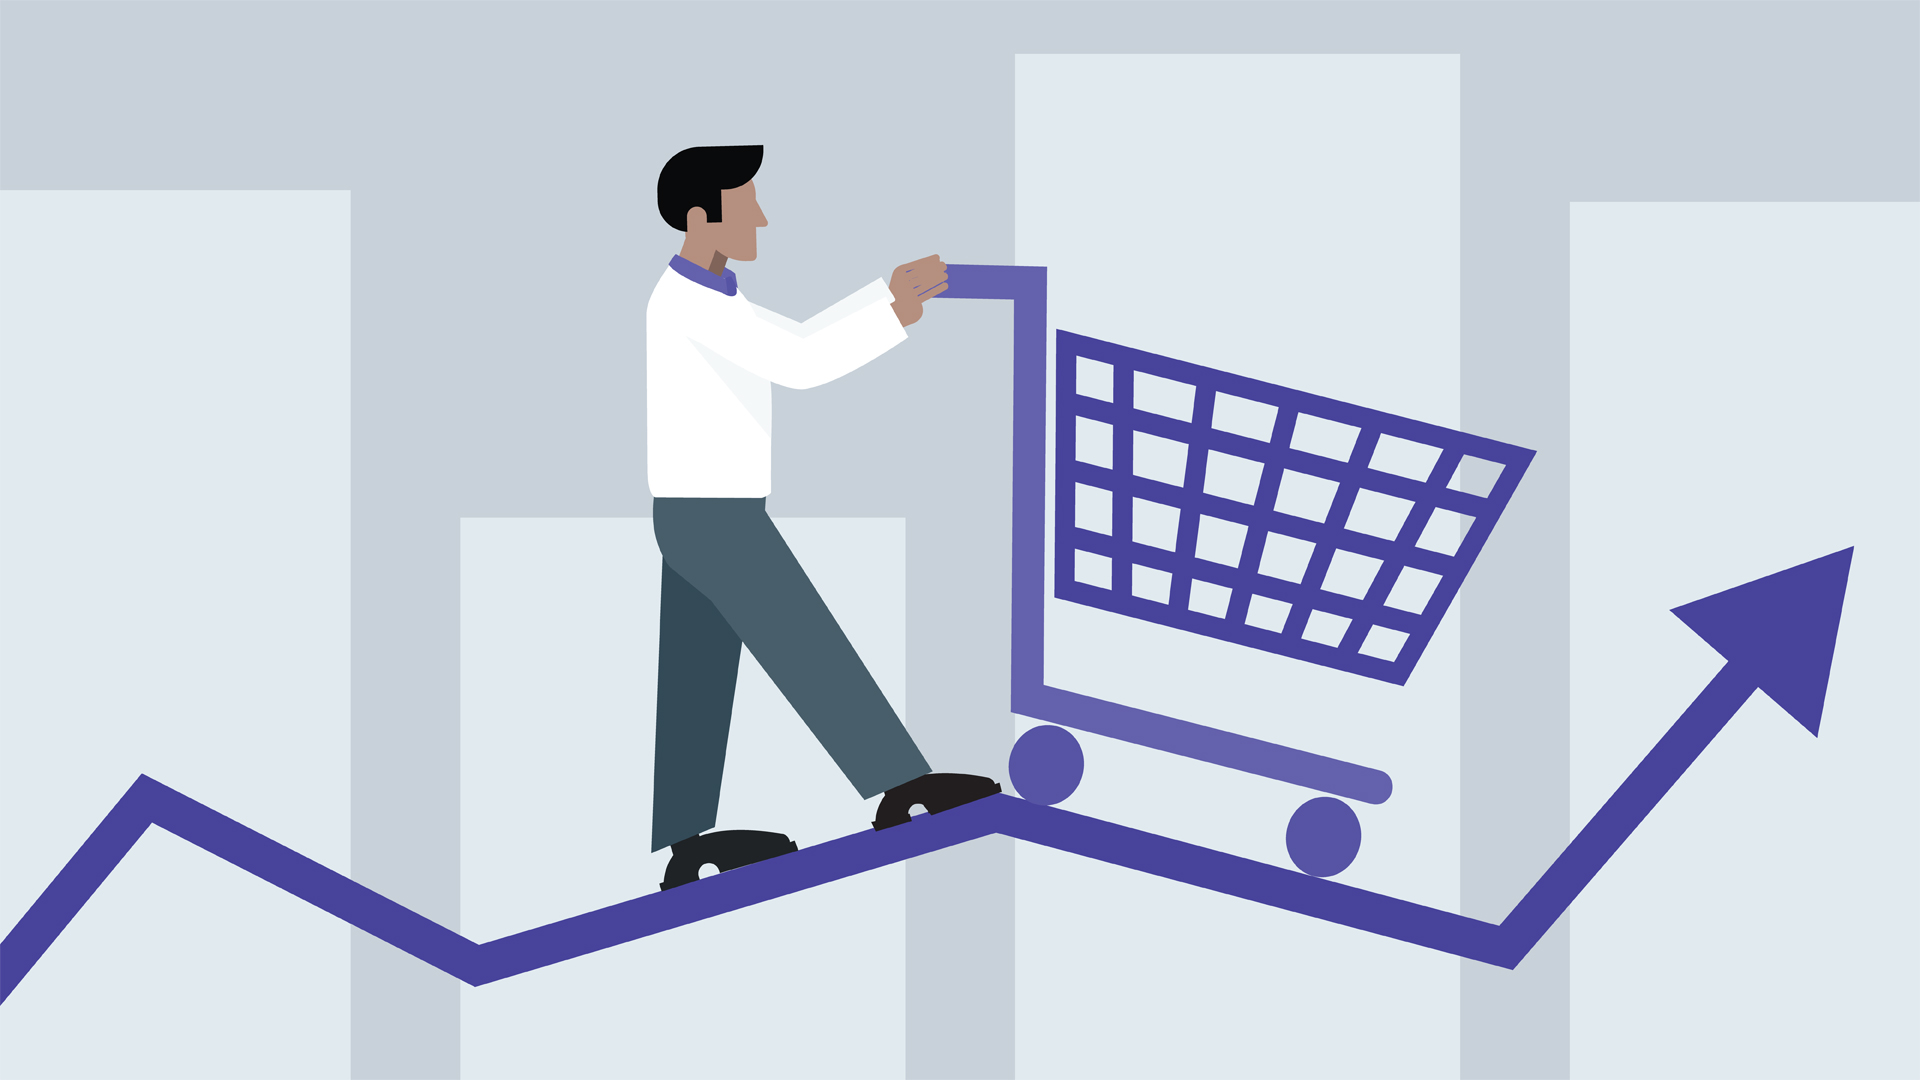

In [304]:
from IPython.display import Image
Image('retail.jpg')

Un supermarché géant a des opérations dans le monde entier. Il traite toutes les principales catégories de produits. Dans cette analyse, un modèle de prévision sera développé à l'aide d'algorithmes d'apprentissage automatique pour améliorer la précision des prévisions de ventes. Plusieurs méthodes de régression seront comparés. 

In [305]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [306]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

In [307]:
df = pd.read_csv('superstore_2011_2015.csv',encoding='unicode_escape')

In [308]:
df.shape

(51290, 24)

In [309]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [310]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

**Description des features :**

* 'Row ID' : Identifiant ligne
* 'Order ID' : Identifiant ordre
* 'Order Date' : Date ordre
* 'Ship Date' : Date d'expédition
* 'Ship Mode' : Mode d'expédition
* 'Customer ID' : Identifiant client
* 'Customer Name' : Nom client
* 'Segment' : Ségment
* 'City' : Cité
* 'State' : Etat
* 'Country' : Pays
* 'Postal Code' : Code postal
* 'Market' : Marché
* 'Region' : Région
* 'Product ID' : identifiant produit
* 'Category' : Catégorie du produit 
* 'Sub-Category' : Sous-catégorie du produit
* 'Product Name' : Nom du produit
* 'Quantity' : Quantité
* 'Discount' :  Remise
* 'Profit' : Profit
* 'Shipping Cost' : Frais d'expédition
* 'Order Priority' : Ordre de priorité
* 'Sales' : Ventes

In [311]:
column_names=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority','Sales']

In [312]:
# Colonne 'Sales' déplacée à la fin, pour une analyse facile de la variable cible

df = df[column_names]

In [313]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",4,0.0,29.640,8.17,High,66.120
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",3,0.5,-26.055,4.82,High,44.865
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",5,0.1,37.770,4.70,Medium,113.670


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Onre marque qu'il y a des colonnes, comme les ID, qui n'ont logiquement aucun impact sur les ventes. Ainsi, on peut les supprimer

In [315]:
df['Ship Mode'].describe()

count              51290
unique                 4
top       Standard Class
freq               30775
Name: Ship Mode, dtype: object

In [316]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Postal Code', 'Ship Mode'], axis= 1, inplace= True)
df.head()

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,1/1/2011,6/1/2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366
2,1/1/2011,5/1/2011,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",4,0.0,29.640,8.17,High,66.120
3,1/1/2011,5/1/2011,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",3,0.5,-26.055,4.82,High,44.865
4,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",5,0.1,37.770,4.70,Medium,113.670


In [317]:
df.shape

(51290, 18)

In [318]:
df.describe(include='all')

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000
unique,1430,1464,795,3,3636,1094,147,7,13,3,17,3788,NaN,NaN,NaN,NaN,4,NaN
top,18-06-2014,22-11-2014,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,Medium,NaN
freq,135,130,108,26518,915,2001,9994,11002,11117,31273,6152,227,NaN,NaN,NaN,NaN,29433,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.476545,0.142908,28.610982,26.375915,NaN,246.490581
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.278766,0.212280,174.340972,57.296804,NaN,487.565361
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,-6599.978000,0.000000,NaN,0.444000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.610000,NaN,30.758625
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,9.240000,7.790000,NaN,85.053000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.200000,36.810000,24.450000,NaN,251.053200


## 1. Exploration des données

### Boxplot

Text(0.5, 1.0, 'Sales by State')

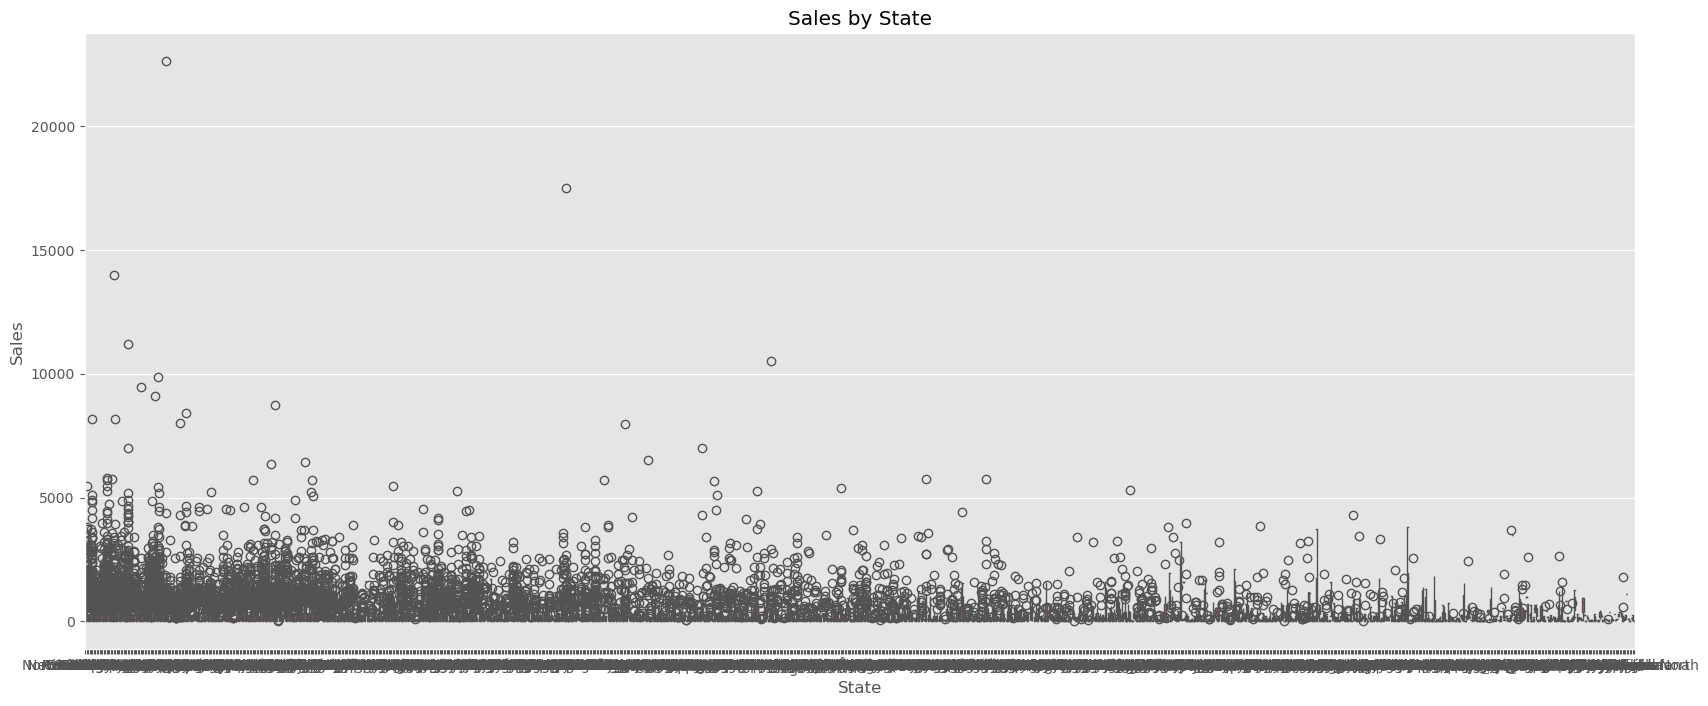

In [319]:
plt.figure(figsize=(20,8))
sns.boxplot(x='State', y='Sales',data = df)
plt.title('Sales by State')

Il est difficile d'interpréter, mais on peut analyser les ventes sur un état particulier. 

Text(0.5, 1.0, 'Sales by Region')

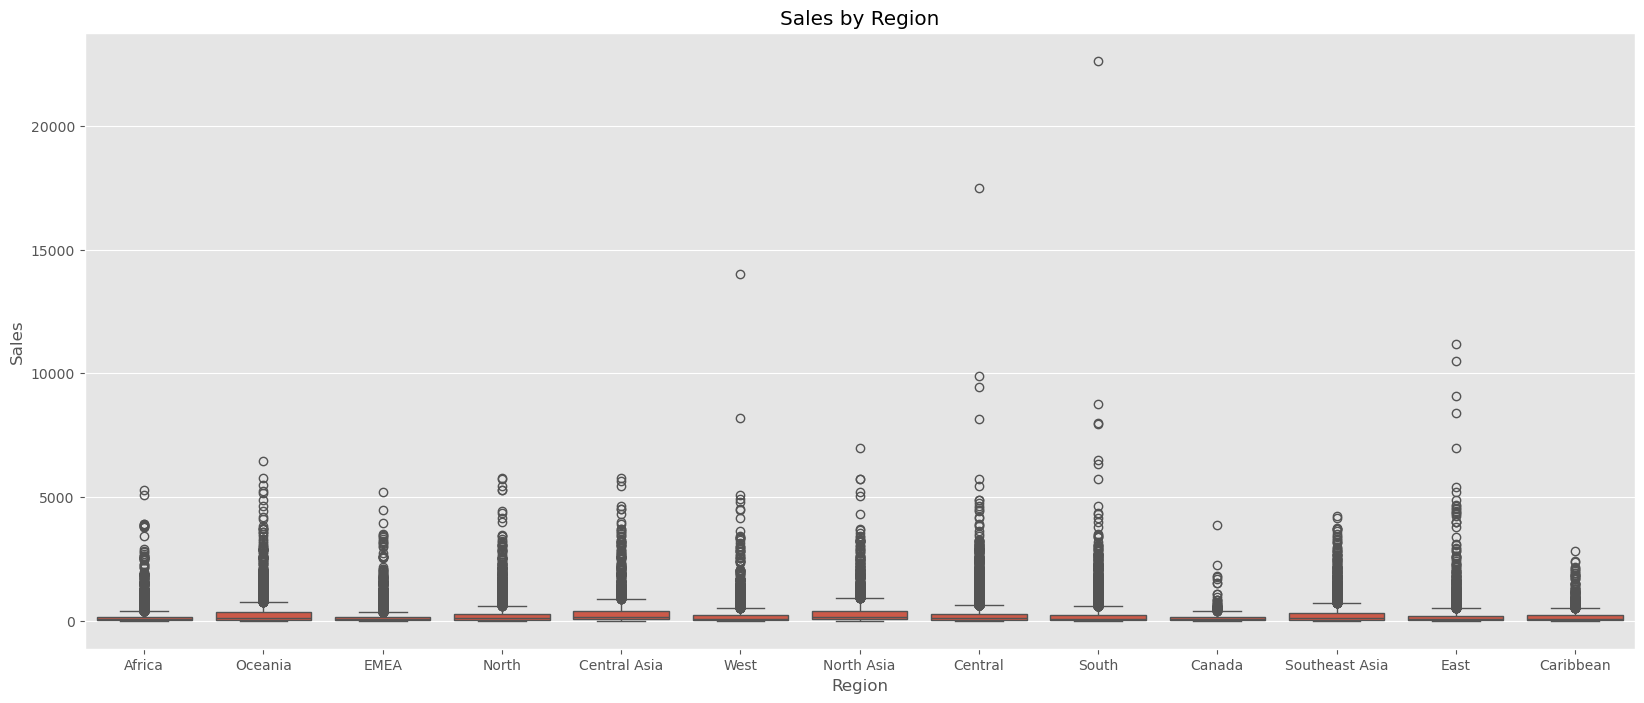

In [320]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Region', y='Sales',data = df)
plt.title('Sales by Region')

Text(0.5, 1.0, 'Sales by Segment')

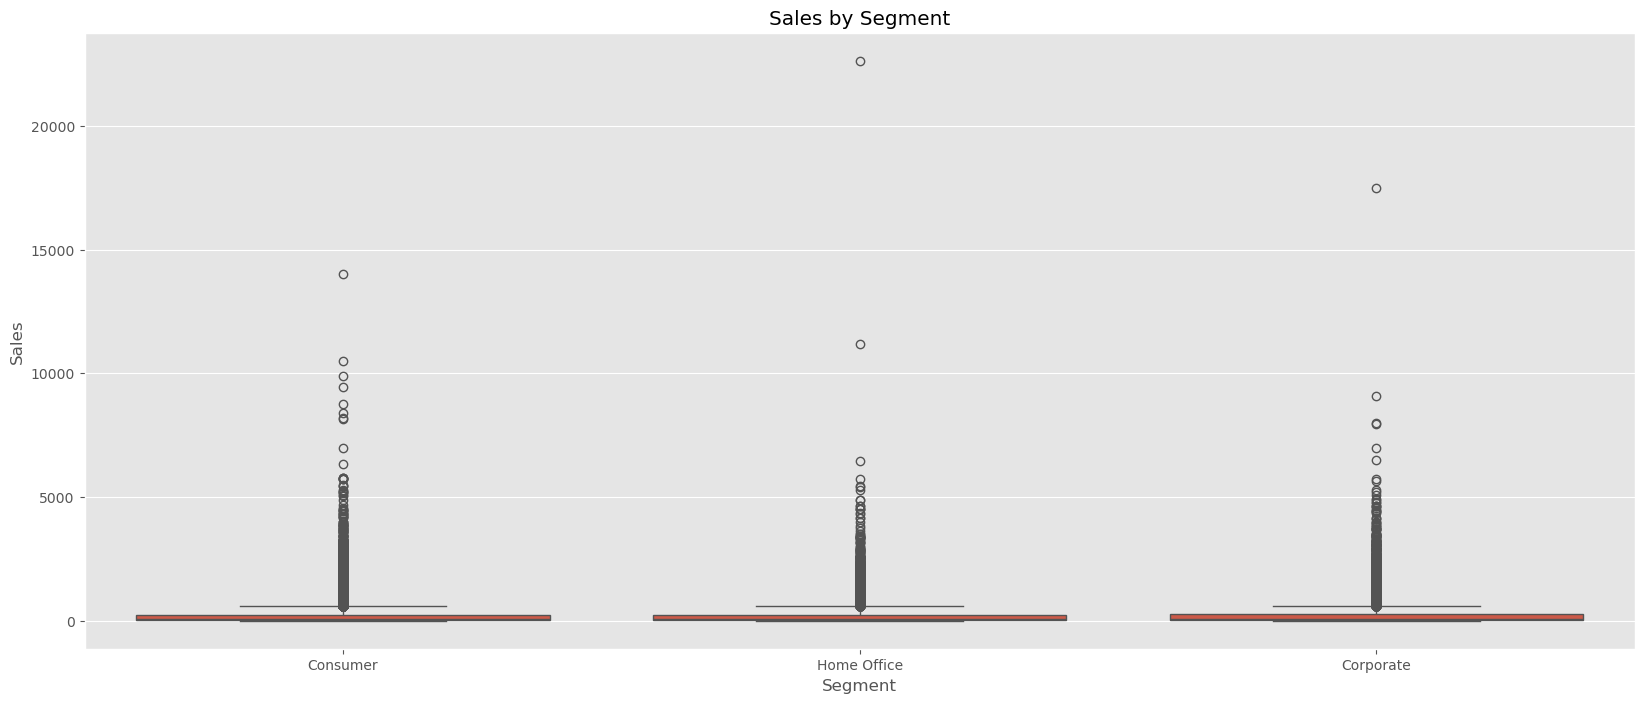

In [321]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Segment', y='Sales',data = df)
plt.title('Sales by Segment')

Text(0.5, 1.0, 'Sales by Order Priority')

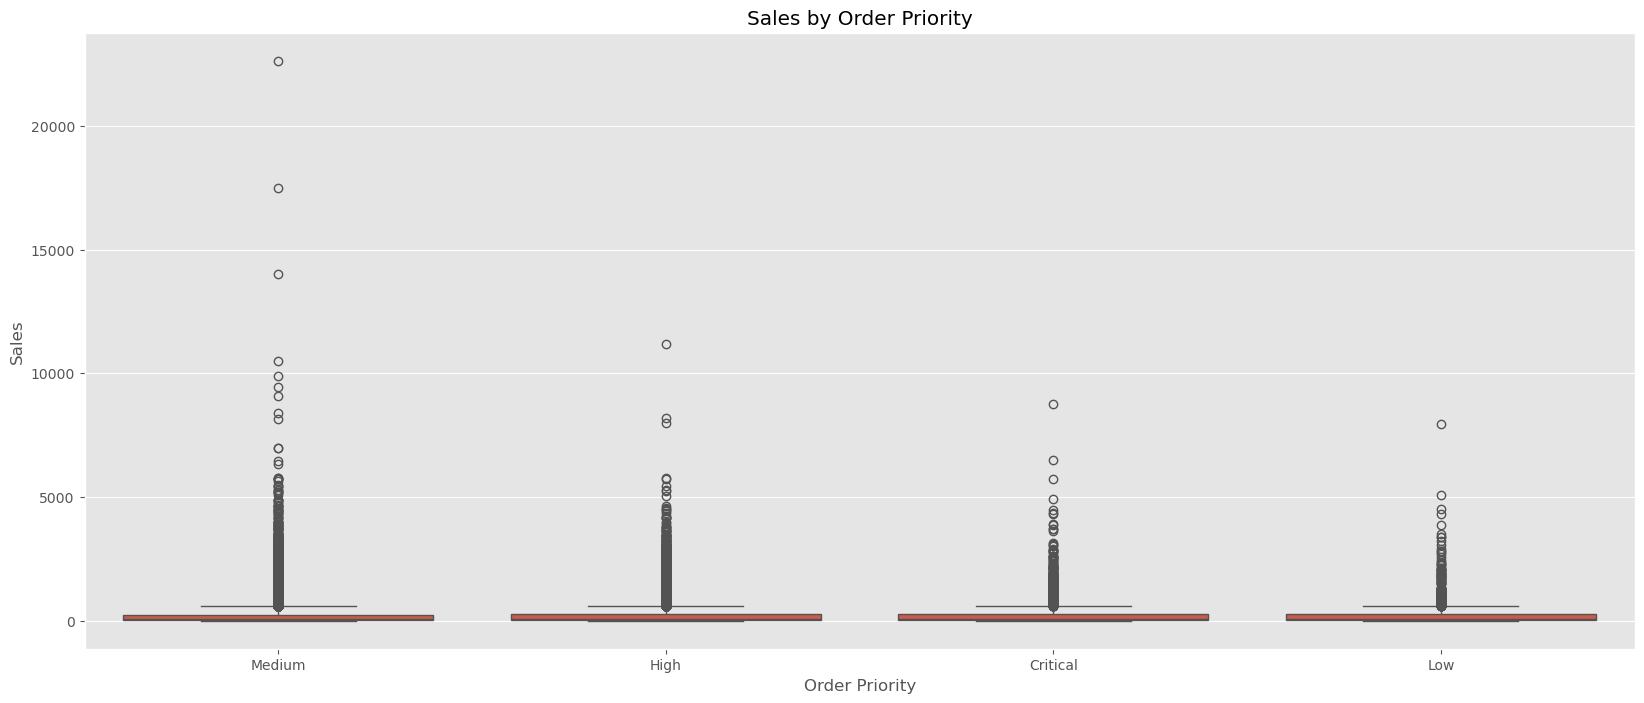

In [322]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Order Priority', y='Sales',data = df)
plt.title('Sales by Order Priority')

Text(0.5, 1.0, 'Sales by Category')

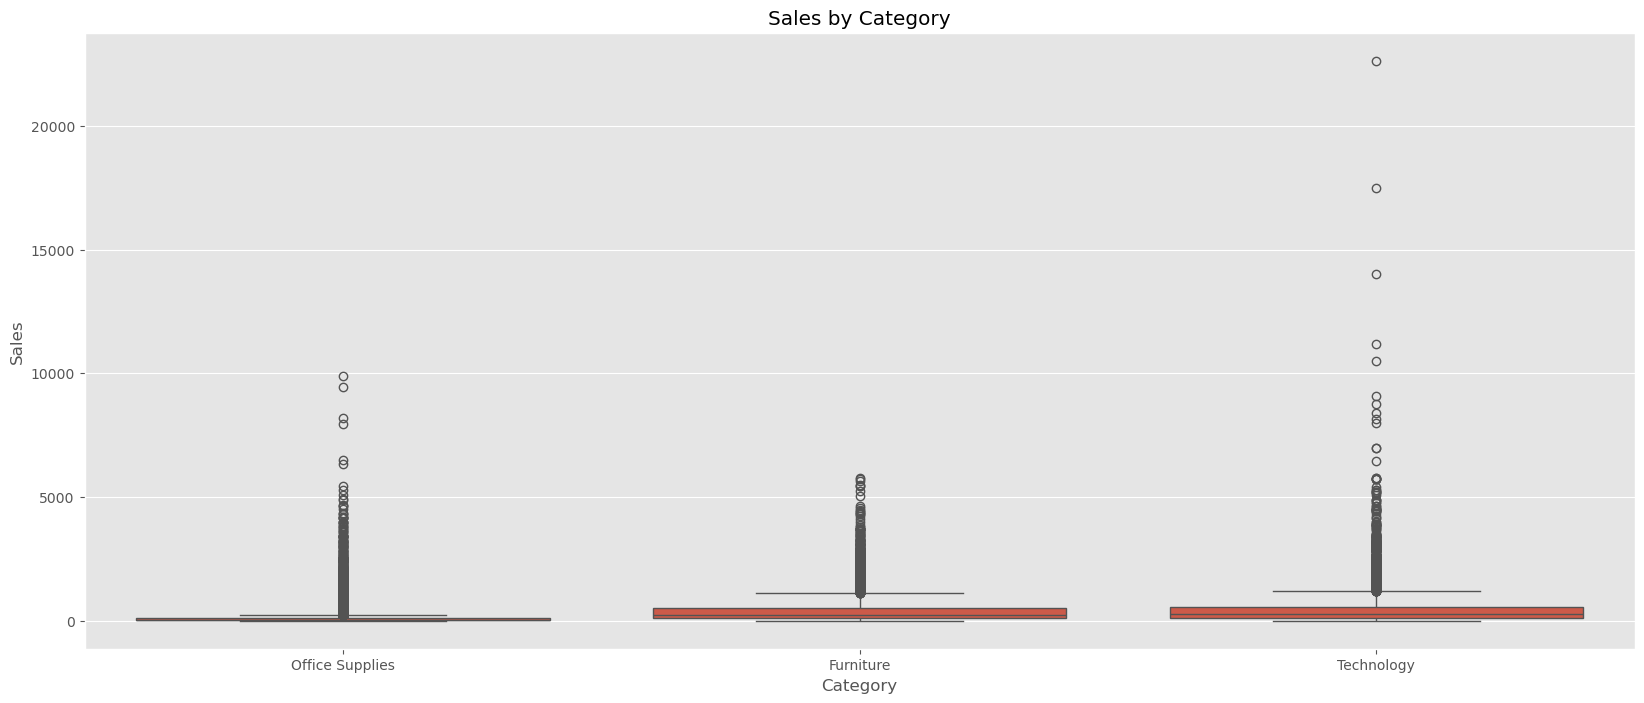

In [323]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Category', y='Sales',data = df)
plt.title('Sales by Category')

Text(0.5, 1.0, 'Sales by Sub-Category')

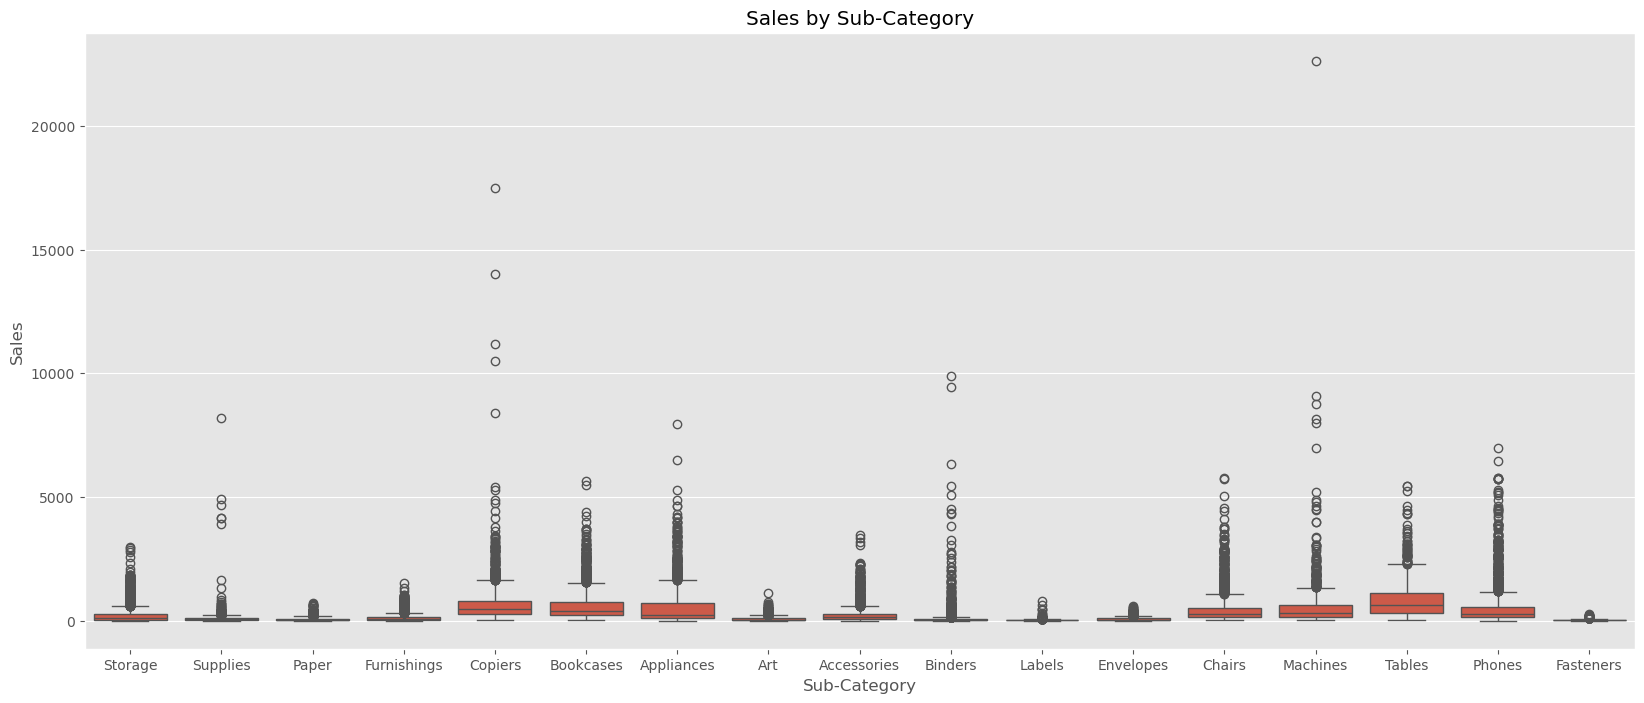

In [324]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Sub-Category', y='Sales',data = df)
plt.title('Sales by Sub-Category')

Text(0.5, 1.0, 'Sales by Market')

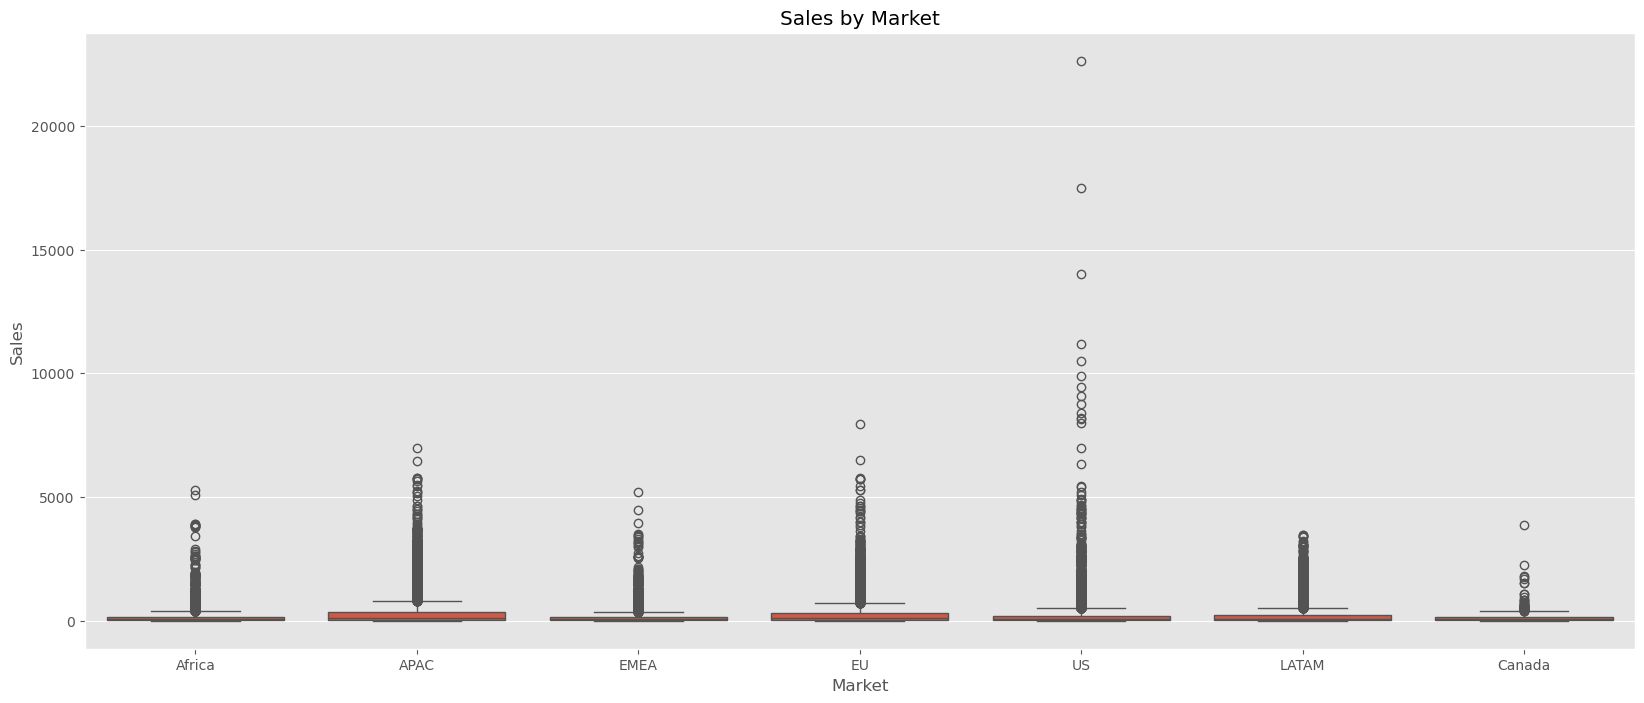

In [325]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Market', y='Sales',data = df)
plt.title('Sales by Market')

Text(0.5, 1.0, 'Sales by Country')

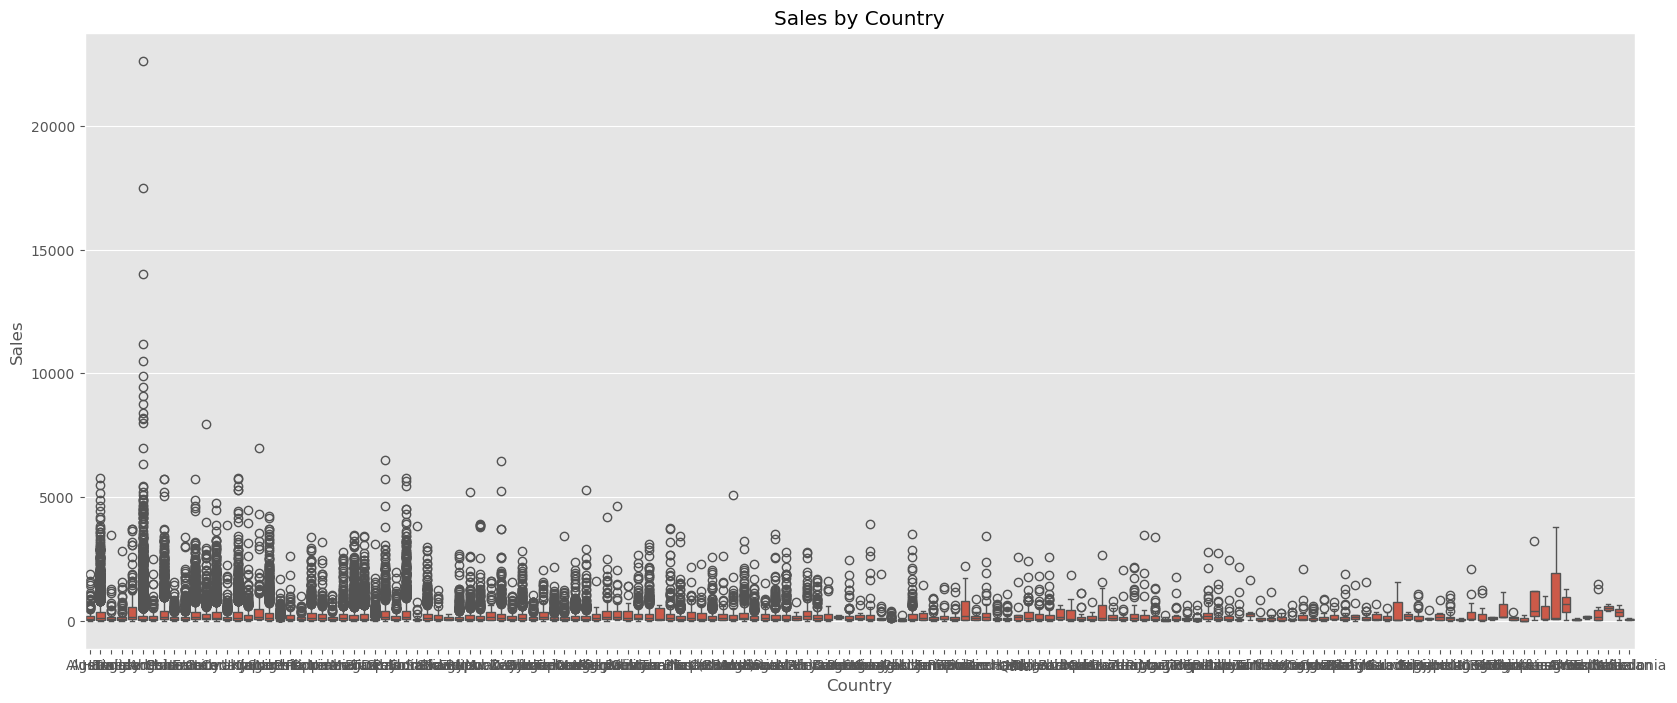

In [326]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Country', y='Sales',data = df)
plt.title('Sales by Country')

In [327]:
df.Country.unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

In [328]:
len(df.Country.unique())

147

### Histogramme - Distribution de la variable cible

In [329]:
print(df.Sales.max())
print(df.Sales.min())

22638.48
0.444


(array([5.075e+04, 4.800e+02, 4.400e+01, 8.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 2.26424760e+03, 4.52805120e+03, 6.79185480e+03,
        9.05565840e+03, 1.13194620e+04, 1.35832656e+04, 1.58470692e+04,
        1.81108728e+04, 2.03746764e+04, 2.26384800e+04]),
 <BarContainer object of 10 artists>)

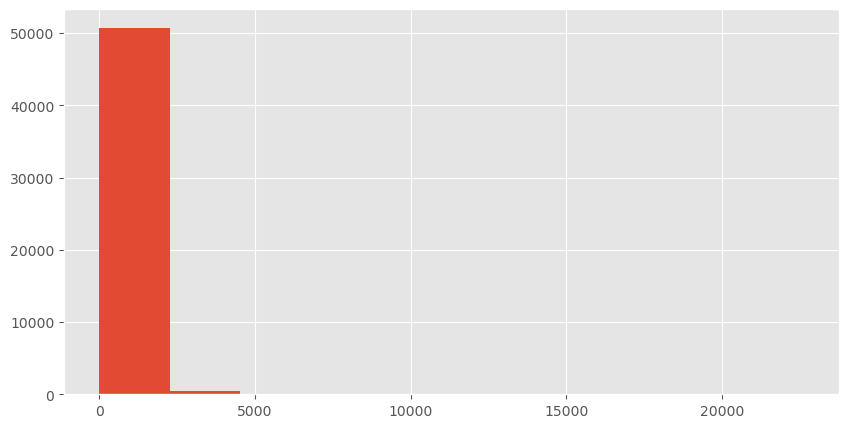

In [330]:
plt.figure(figsize=(10,5))
plt.hist(x='Sales',data=df,bins=10)

### Distribution Plot - variable cible 

<Axes: xlabel='Sales', ylabel='Density'>

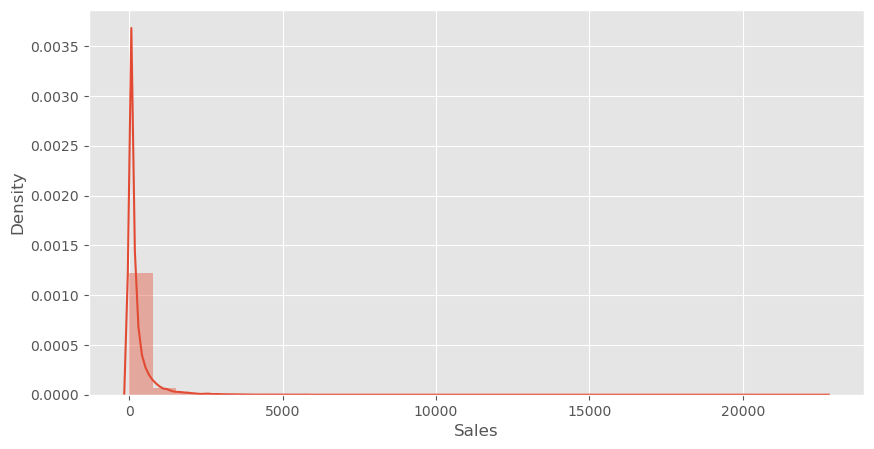

In [331]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'], bins=30)

### Nombre de valeurs uniques pour chaque feature

In [332]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Sales'], dtype=object)

In [333]:
columns_name=['No unqiue values']

In [334]:
pd.DataFrame(df.nunique(),columns=columns_name)

,No unqiue values
Order Date,1430
Ship Date,1464
Customer Name,795
Segment,3
City,3636
State,1094
Country,147
Market,7
Region,13
Category,3


### Correlation - Heatmap

In [335]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Sales'], dtype=object)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Date       51290 non-null  object 
 2   Customer Name   51290 non-null  object 
 3   Segment         51290 non-null  object 
 4   City            51290 non-null  object 
 5   State           51290 non-null  object 
 6   Country         51290 non-null  object 
 7   Market          51290 non-null  object 
 8   Region          51290 non-null  object 
 9   Category        51290 non-null  object 
 10  Sub-Category    51290 non-null  object 
 11  Product Name    51290 non-null  object 
 12  Quantity        51290 non-null  int64  
 13  Discount        51290 non-null  float64
 14  Profit          51290 non-null  float64
 15  Shipping Cost   51290 non-null  float64
 16  Order Priority  51290 non-null  object 
 17  Sales           51290 non-null 

In [337]:
categorical = ['Order Date','Ship Date','Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Order Priority']

In [338]:
numerical = [x for x in df.columns.to_list() if x not in categorical]

In [339]:
numerical

['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Sales']

Rappelons la covariance et le coefficient de correlation de Pearson
$$cov(x,y)=\sum_{i=1}^n \left(x_i-mean_x\right)\left(y_i-mean_y\right),\;person = \rho_{x,y}=\dfrac{cov(x,y)}{std_x.std_y}$$

In [340]:
corr_data = df[numerical]
corr = corr_data.corr(method='pearson')
corr

,Quantity,Discount,Profit,Shipping Cost,Sales
Quantity,1.000000,-0.019875,0.104365,0.272649,0.313577
Discount,-0.019875,1.000000,-0.316490,-0.079056,-0.086722
Profit,0.104365,-0.316490,1.000000,0.354441,0.484918
Shipping Cost,0.272649,-0.079056,0.354441,1.000000,0.768073
Sales,0.313577,-0.086722,0.484918,0.768073,1.000000


Text(0.5, 1.0, 'Matrice de corrélation')

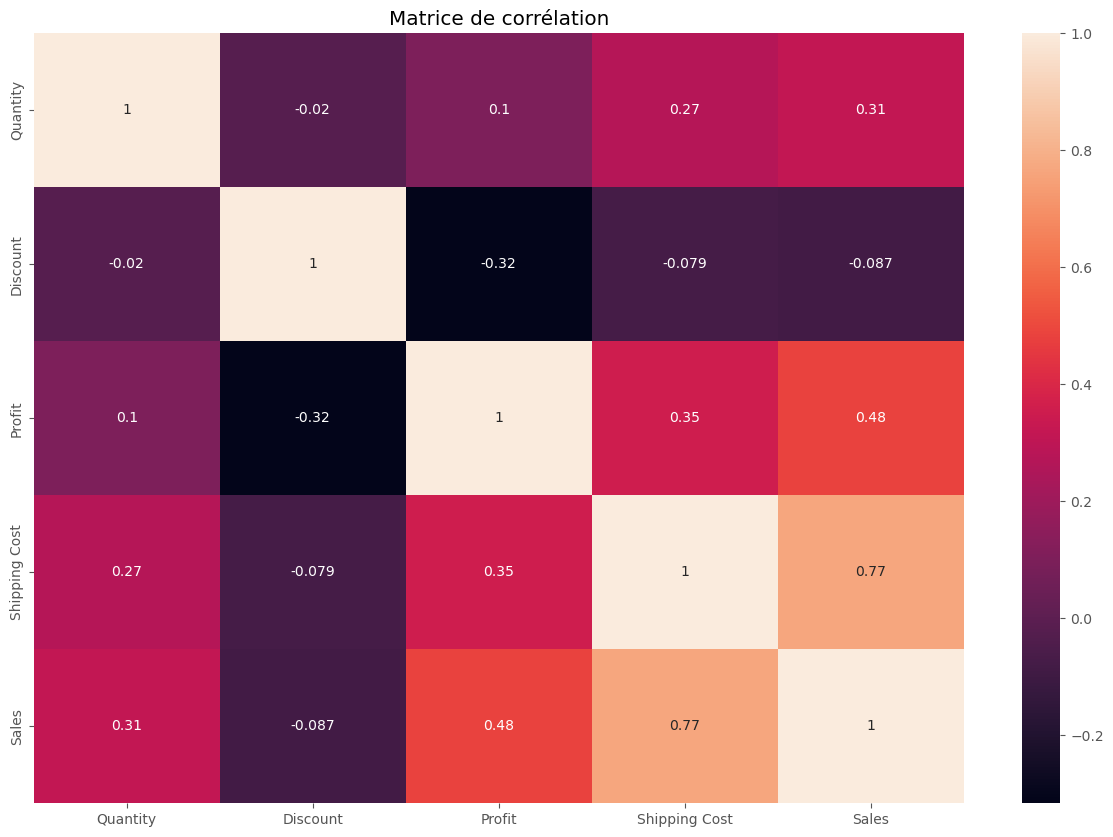

In [341]:
cor_plot = sns.heatmap(corr, annot=True)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Matrice de corrélation')

* 'Shipping Cost' et 'Sales' sont corrélées au maximum (0.77)
* 'Profit' et 'Sales' sont corrélées (0.48)
* Pas de corrélation entre 'Discount' et 'Sales'
* 'Profit' et 'Discount' sont corrélées négativement

### Regression plot

<Axes: xlabel='Quantity', ylabel='Sales'>

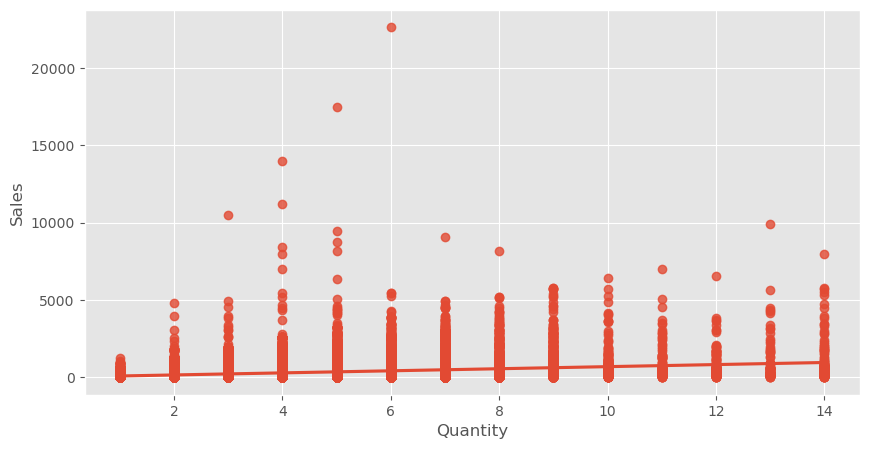

In [342]:
plt.figure(figsize=(10,5))
sns.regplot(x='Quantity',y='Sales', data=df)

<Axes: xlabel='Discount', ylabel='Sales'>

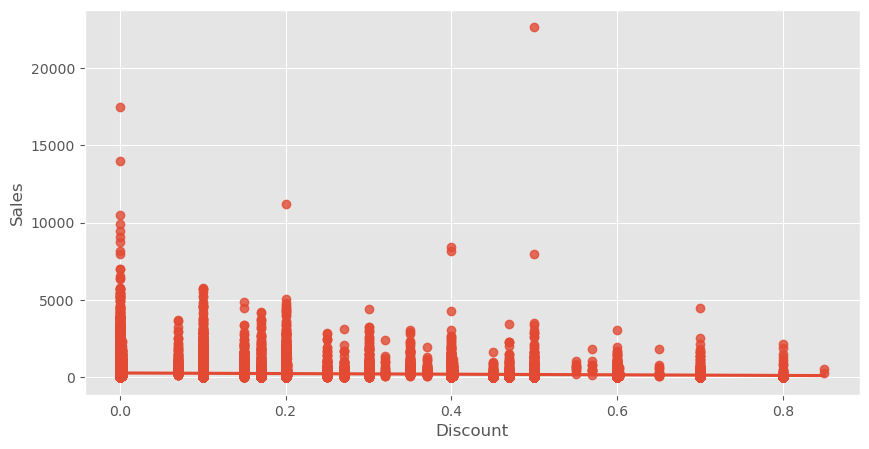

In [343]:
plt.figure(figsize=(10,5))
sns.regplot(x='Discount',y='Sales', data=df)

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

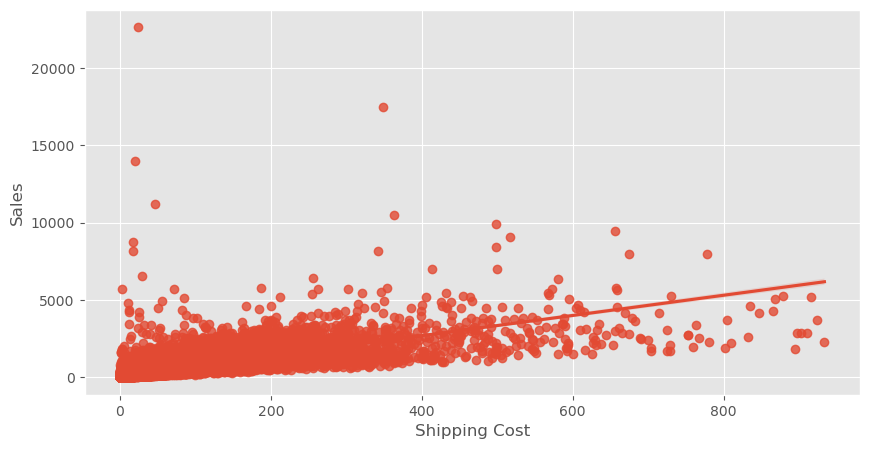

In [344]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shipping Cost',y='Sales', data=df)

<Axes: xlabel='Profit', ylabel='Sales'>

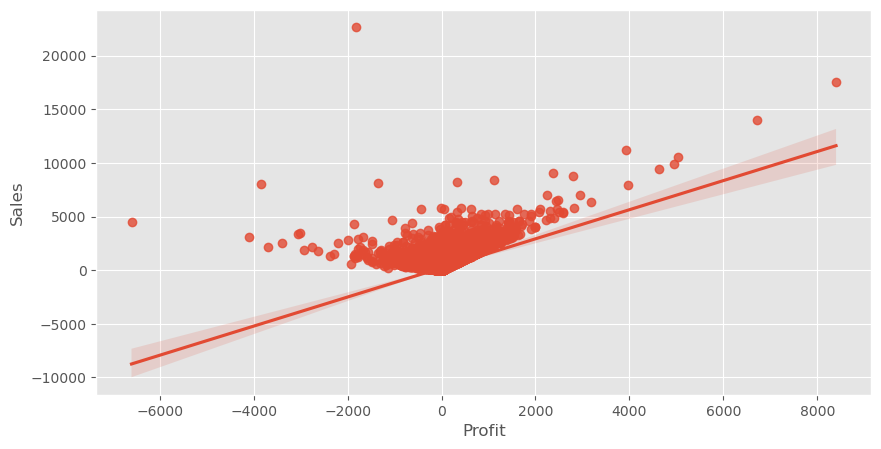

In [345]:
plt.figure(figsize=(10,5))
sns.regplot(x='Profit',y='Sales', data=df)

## Bar Plot

Text(0.5, 1.0, 'Sales by Segment')

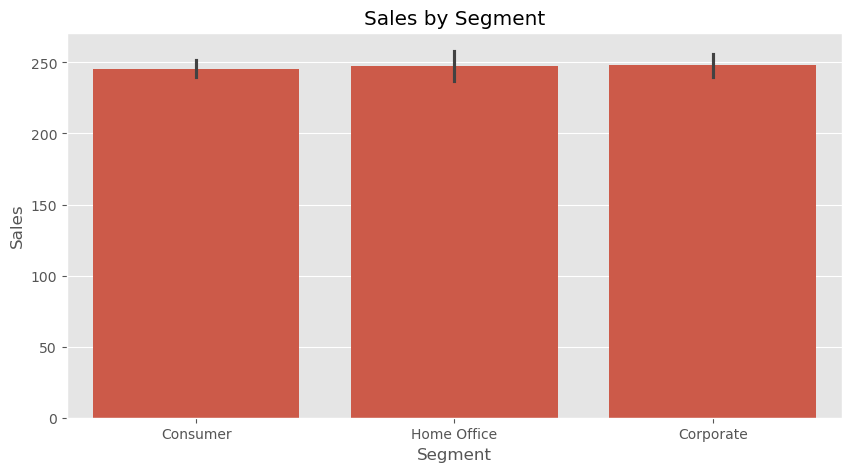

In [346]:
plt.figure(figsize=(10,5))
sns.barplot(x='Segment', y='Sales',data=df)
plt.title('Sales by Segment')

Text(0.5, 1.0, 'Sales by City')

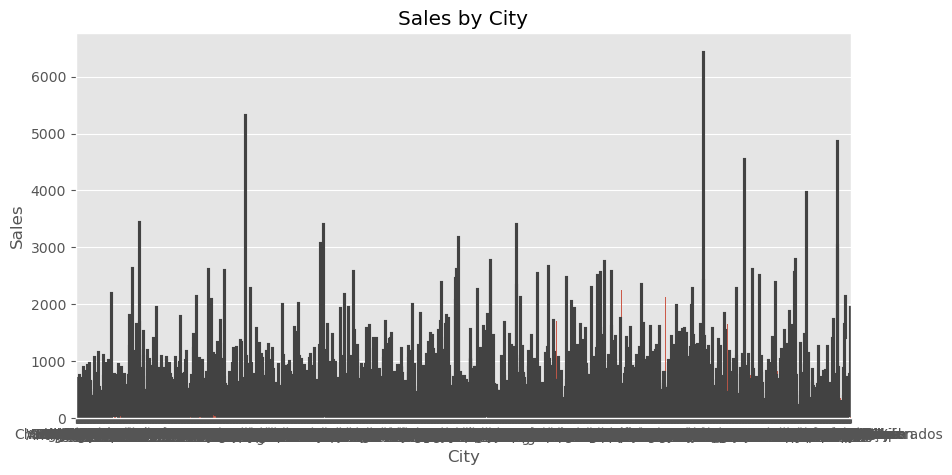

In [347]:
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Sales',data=df)
plt.title('Sales by City')

Text(0.5, 1.0, 'Sales by State')

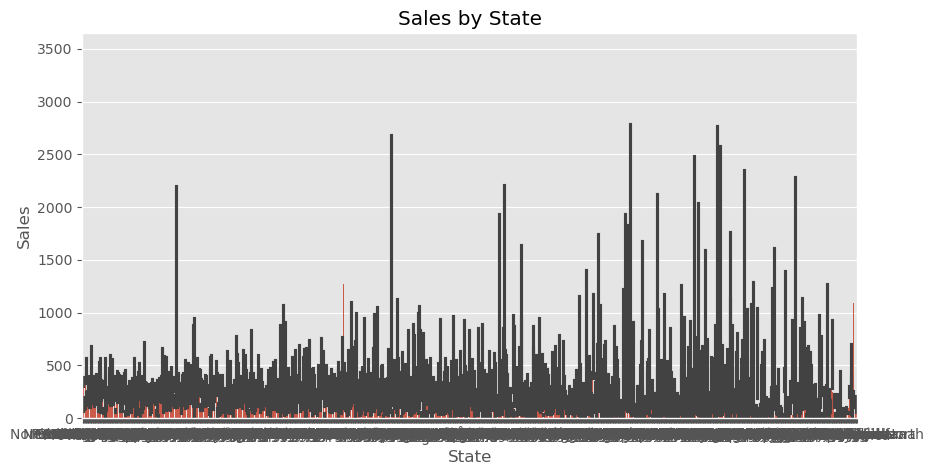

In [348]:
plt.figure(figsize=(10,5))
sns.barplot(x='State', y='Sales',data=df)
plt.title('Sales by State')

Text(0.5, 1.0, 'Sales by Country')

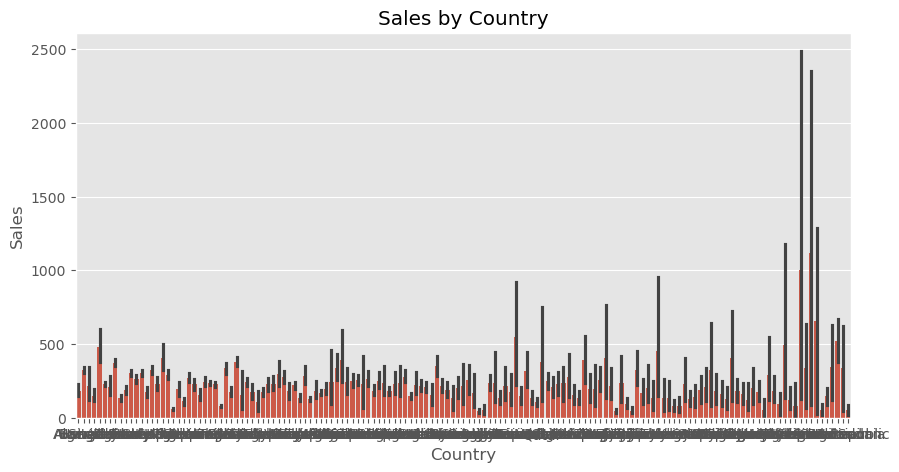

In [349]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='Sales',data=df)
plt.title('Sales by Country')

Pas trop lisible, car on 3636 'City', 1094 'State' et 147 'Country'.

Text(0.5, 1.0, 'Sales by Market')

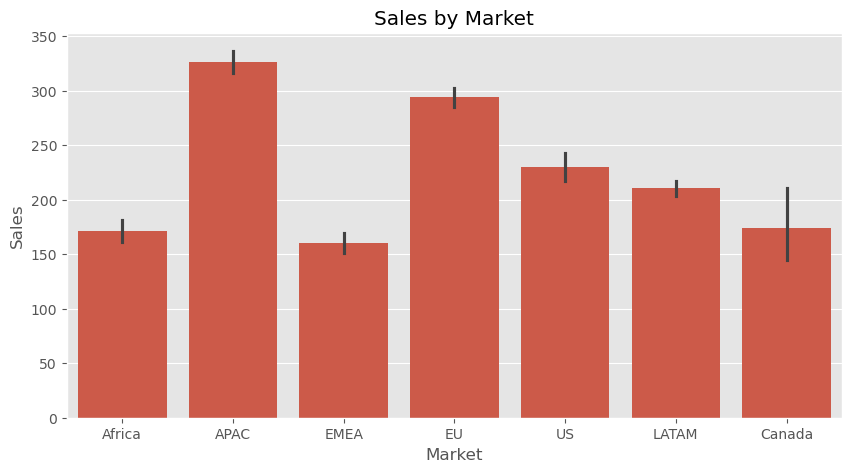

In [350]:
plt.figure(figsize=(10,5))
sns.barplot(x='Market', y='Sales',data=df)
plt.title('Sales by Market')

APAC tops all the Markets.

Text(0.5, 1.0, 'Sales by Region')

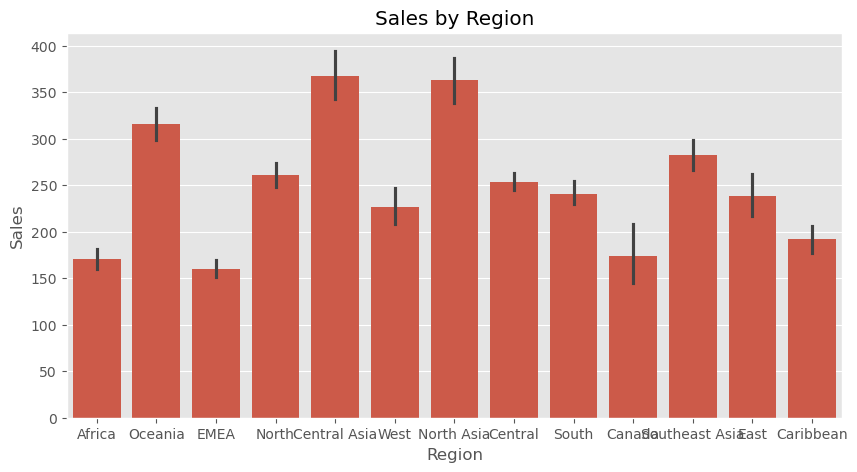

In [351]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Sales',data=df)
plt.title('Sales by Region')

Text(0.5, 1.0, 'Sales by Category')

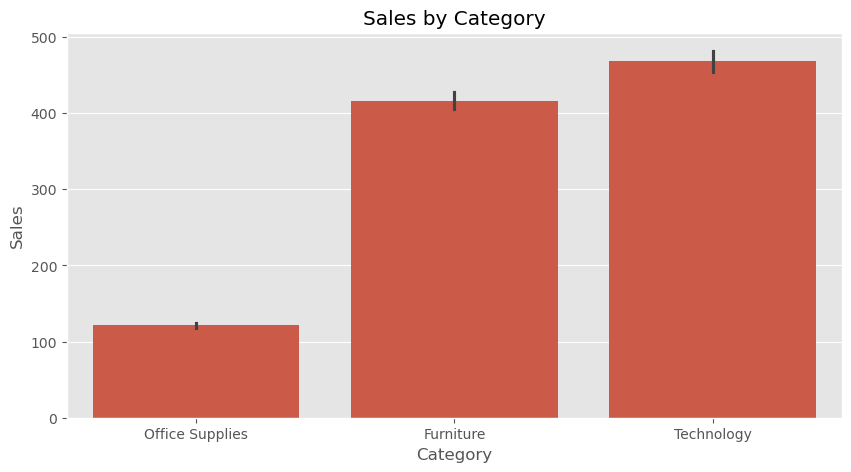

In [352]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Sales',data=df)
plt.title('Sales by Category')

Text(0.5, 1.0, 'Sales by Sub-Category')

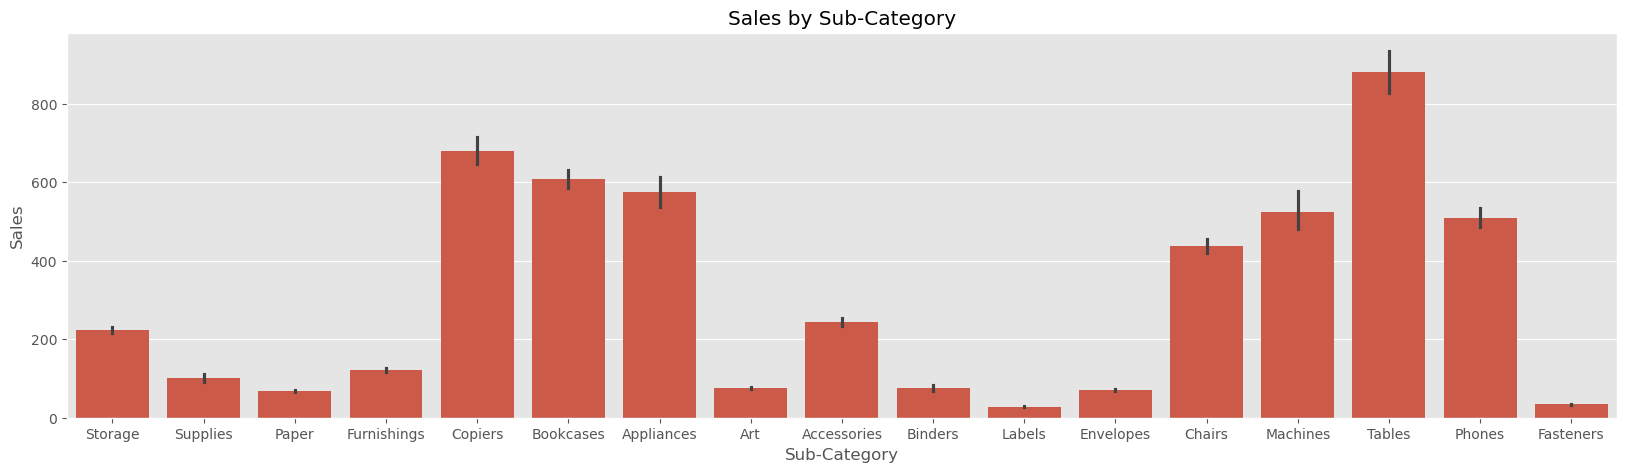

In [353]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category', y='Sales',data=df)
plt.title('Sales by Sub-Category')

Text(0.5, 1.0, 'Sales by Priority')

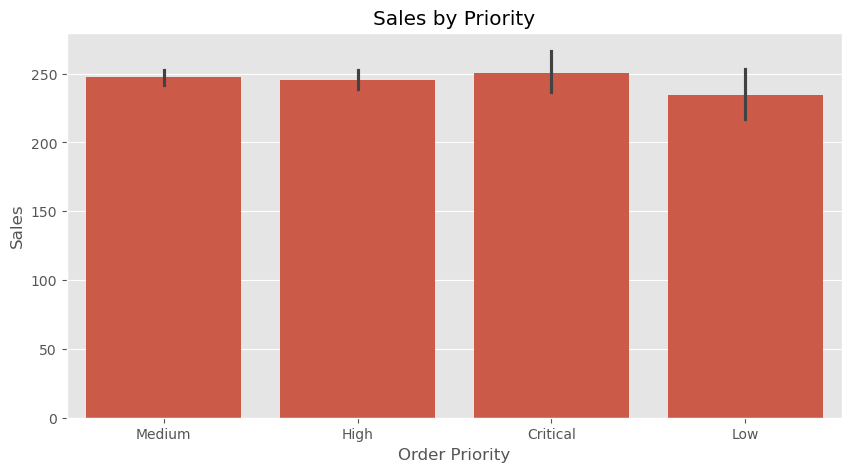

In [354]:
plt.figure(figsize=(10,5))
sns.barplot(x='Order Priority', y='Sales',data=df)
plt.title('Sales by Priority')

**Top 10 countries**

In [355]:
f1 = pd.read_csv('superstore_2011_2015.csv', encoding = 'unicode_escape')

Text(0.5, 0, 'Countries')

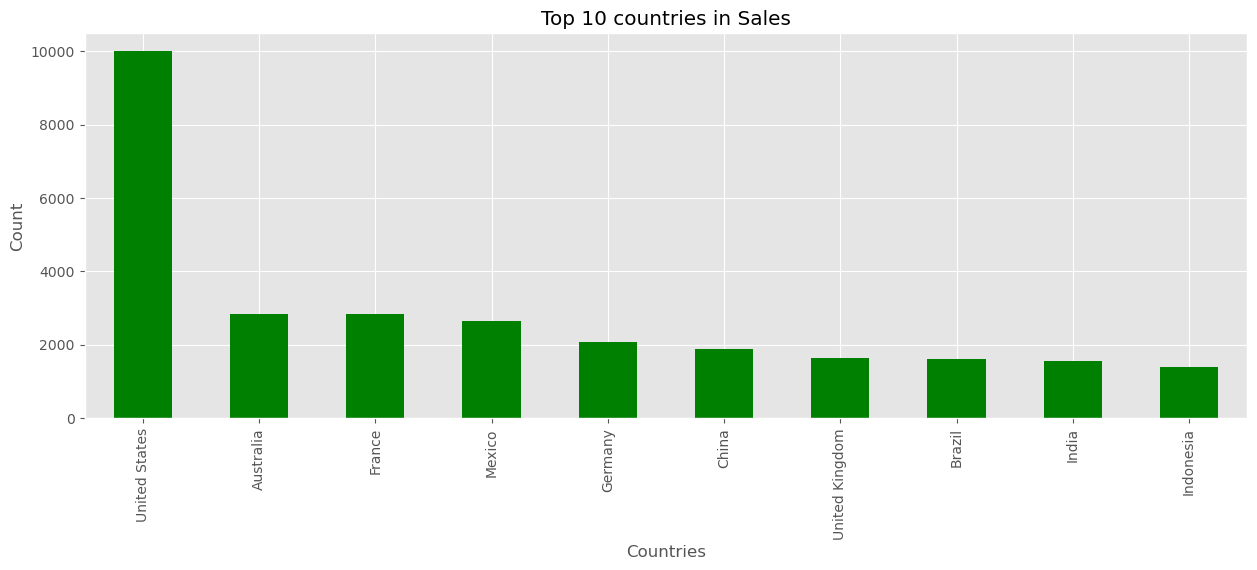

In [356]:
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Country')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries[0:10]
top10countries.plot(kind='bar',color='green')
plt.title('Top 10 countries in Sales')
plt.ylabel('Count')
plt.xlabel('Countries')

US tops all the countries in Sales.

**Top 10 States**

Text(0.5, 0, 'States')

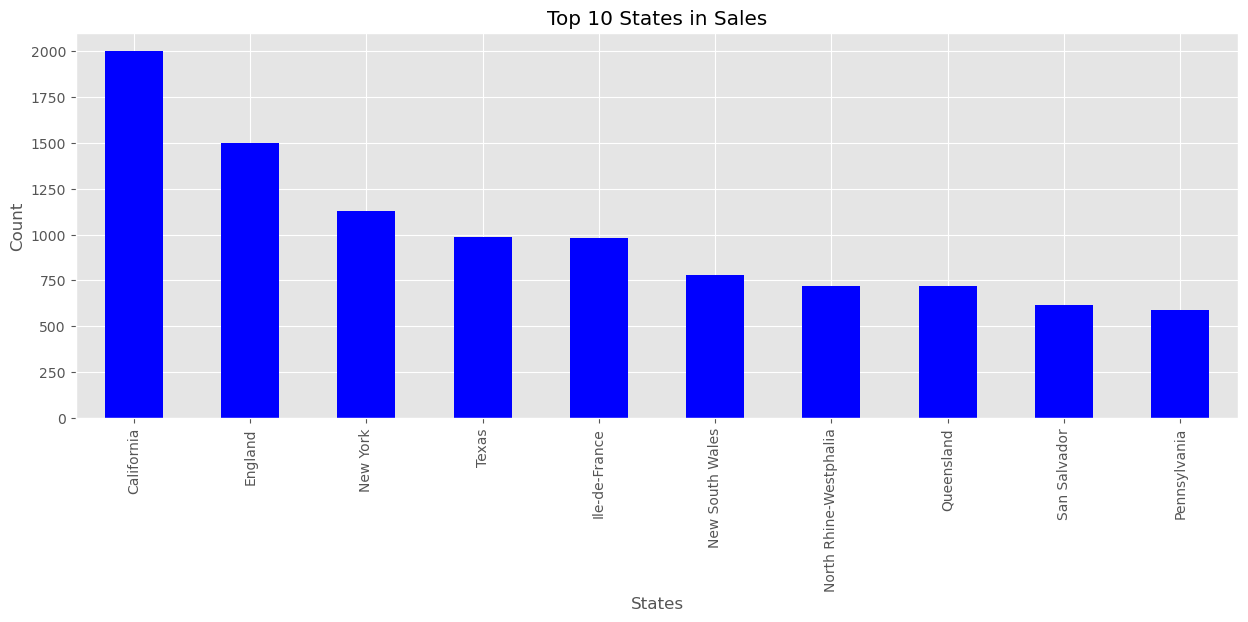

In [357]:
plt.figure(figsize=(15,5))
top10states = f1.groupby('State')['Row ID'].count().sort_values(ascending=False)
top10states = top10states[0:10]
top10states.plot(kind='bar',color='blue')
plt.title('Top 10 States in Sales')
plt.ylabel('Count')
plt.xlabel('States')

California tops all the States in Sales.

**Top 10 Products**

Text(0.5, 0, 'Product Name')

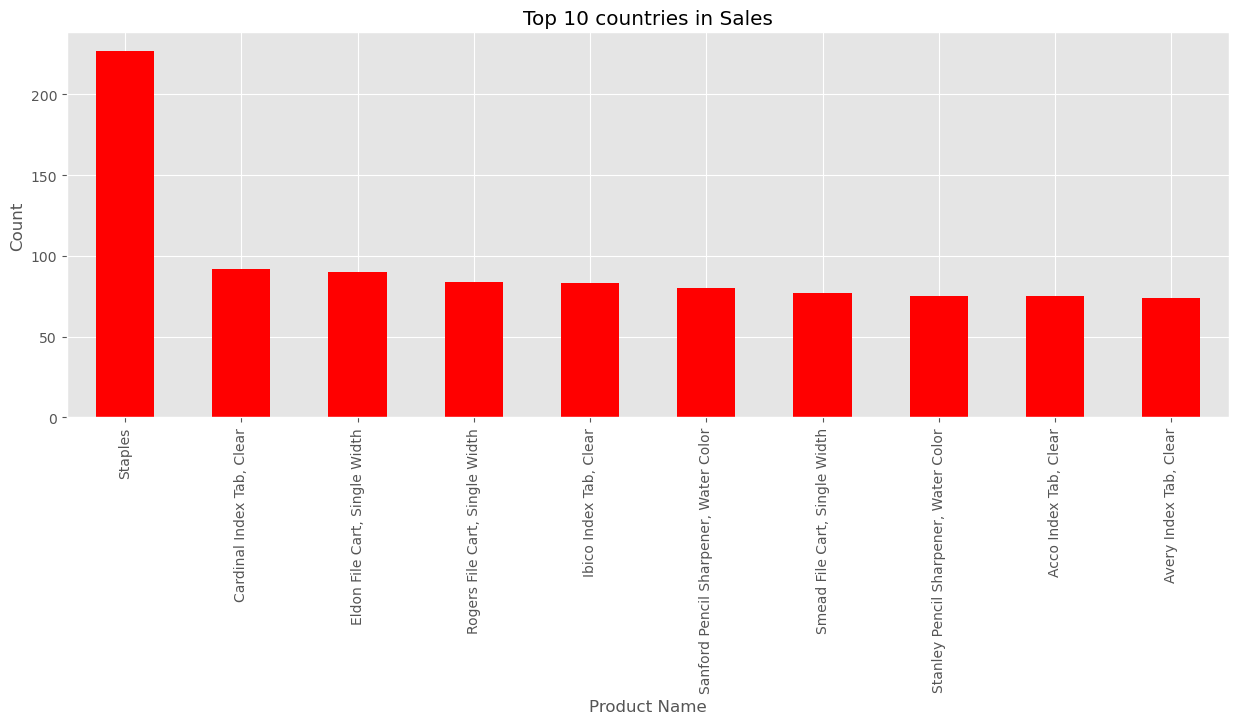

In [358]:
plt.figure(figsize=(15,5))
top10pn = f1.groupby('Product Name')['Row ID'].count().sort_values(ascending=False)
top10pn = top10pn[0:10]
top10pn.plot(kind='bar',color='red')
plt.title('Top 10 countries in Sales')
plt.ylabel('Count')
plt.xlabel('Product Name')

Straples (agrafes) tops all the Products in Sales

**Top 10 Customers**

<Axes: xlabel='Customer Name', ylabel='Sales'>

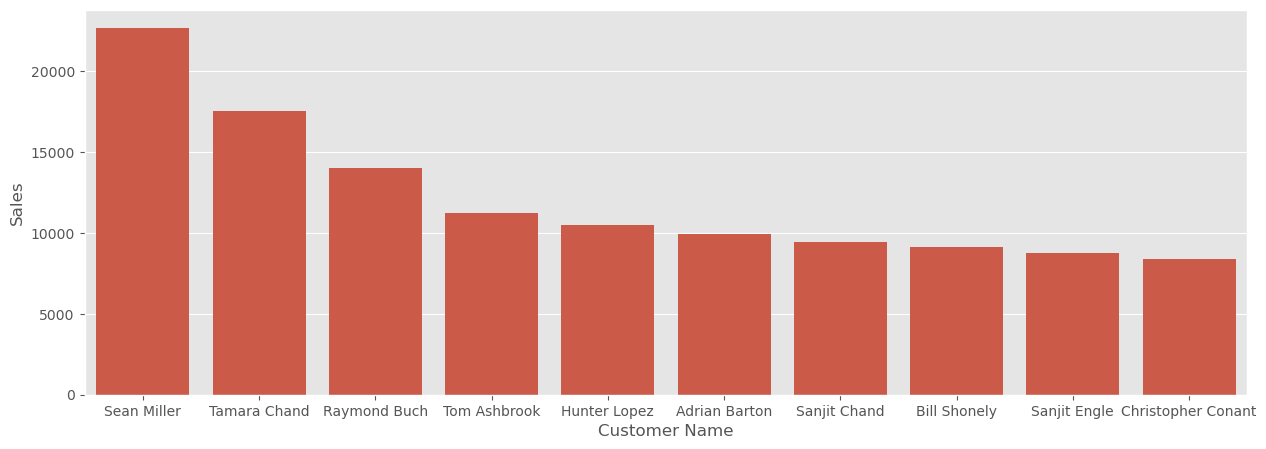

In [359]:
plt.figure(figsize=(15,5))
top10profit = f1.sort_values('Sales',ascending=False)
top10 = top10profit.head(10)
top10[['Customer Name', 'Sales']]
sns.barplot(x='Customer Name', y= 'Sales',data=top10)

Sean Miller top customer in terms of Sales

**Total Sales by Region**

In [360]:
f1['Region'].value_counts()

Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

Text(0.5, 0, 'Region')

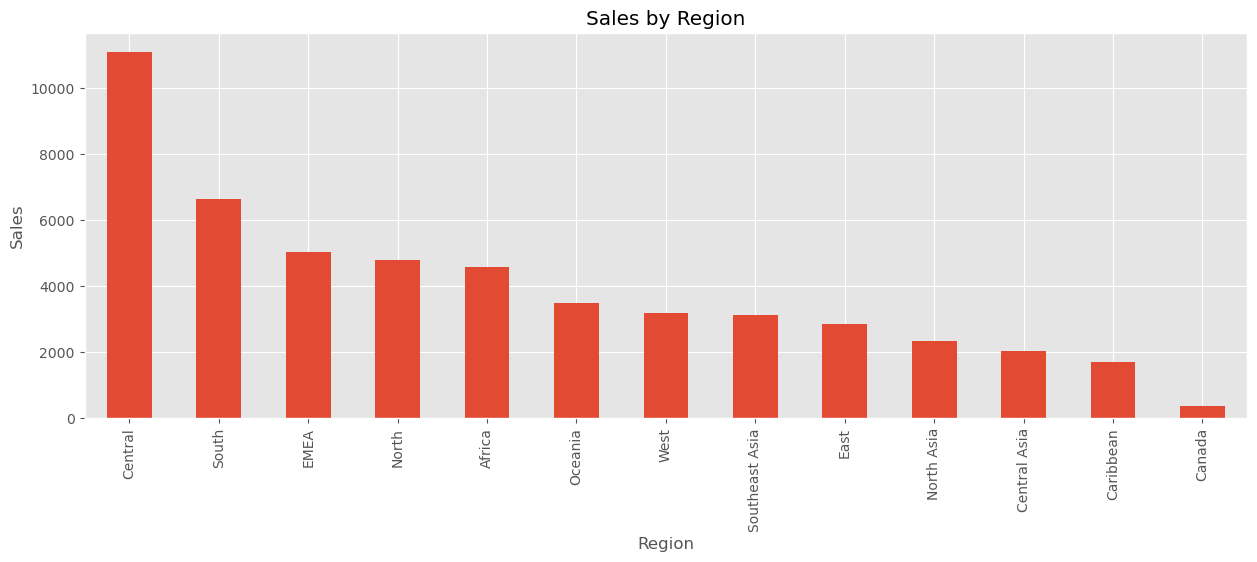

In [361]:
plt.figure(figsize=(15,5))
f1['Region'].value_counts().plot.bar()
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')

Central tops all the Sales in Regions

**No of Sales by Ship Mode**

Text(0.5, 29.999999999999986, 'Ship Modes')

<Figure size 1200x500 with 0 Axes>

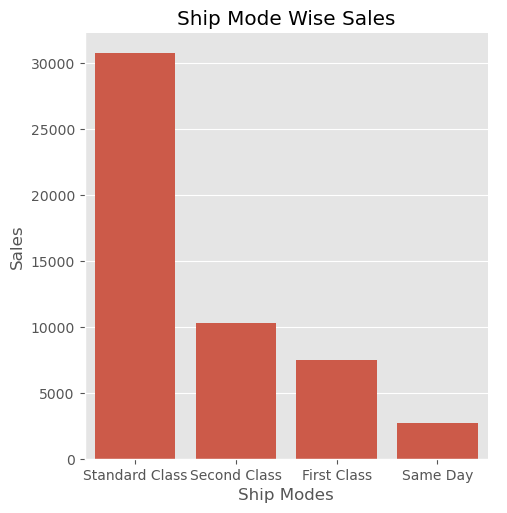

In [362]:
plt.figure(figsize=(12,5))
sns.catplot(x='Ship Mode', kind='count', data =f1)
plt.title('Ship Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')

**Conversion des types de données de 'Order Date' et 'Ship Date'**

In [363]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed')

In [364]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='mixed')

In [365]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df.head()

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
0,2011-01-01,2011-06-01,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300,2011
1,2011-01-01,2011-08-01,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366,2011
2,2011-01-01,2011-05-01,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",4,0.0,29.640,8.17,High,66.120,2011
3,2011-01-01,2011-05-01,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",3,0.5,-26.055,4.82,High,44.865,2011
4,2011-01-01,2011-08-01,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",5,0.1,37.770,4.70,Medium,113.670,2011


<Axes: xlabel='year', ylabel='Sales'>

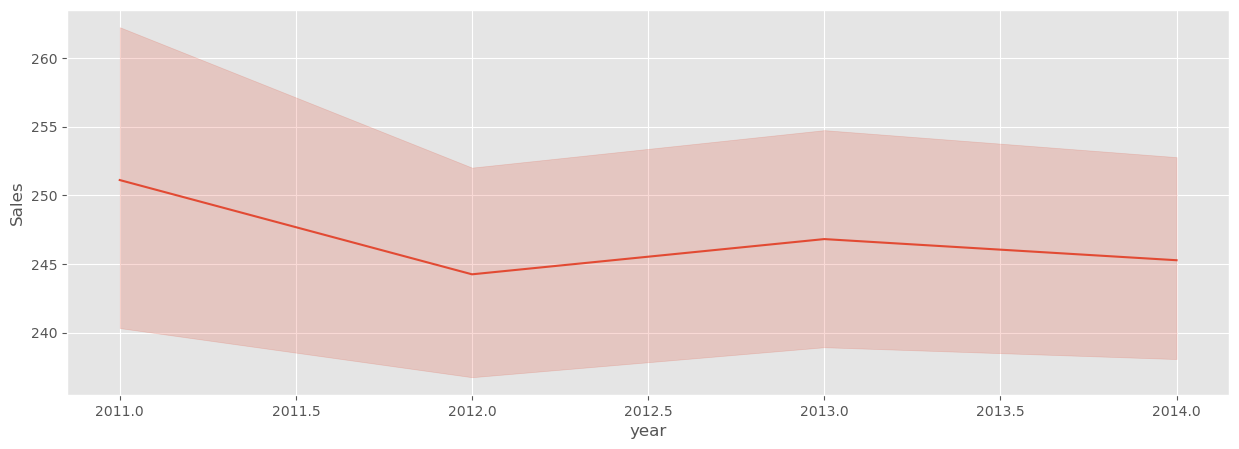

In [366]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='Sales',data=df)

## 2. Prétraitement des données

### Lignes dubliquées

In [367]:
df.duplicated().sum()

0

In [368]:
df.drop_duplicates(keep='first').shape

(51290, 19)

### Convertir les features catégoriques et éviter la dépendance

In [369]:
df.Region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [370]:
df2 = pd.get_dummies(df[['Region', 'Sales']],drop_first=True)
df2.head()

,Sales,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,408.300,False,False,False,False,False,False,False,False,False,False,False,False
1,120.366,False,False,False,False,False,False,False,False,True,False,False,False
2,66.120,False,False,False,False,True,False,False,False,False,False,False,False
3,44.865,False,False,False,False,False,False,True,False,False,False,False,False
4,113.670,False,False,False,False,False,False,False,False,True,False,False,False


<Axes: >

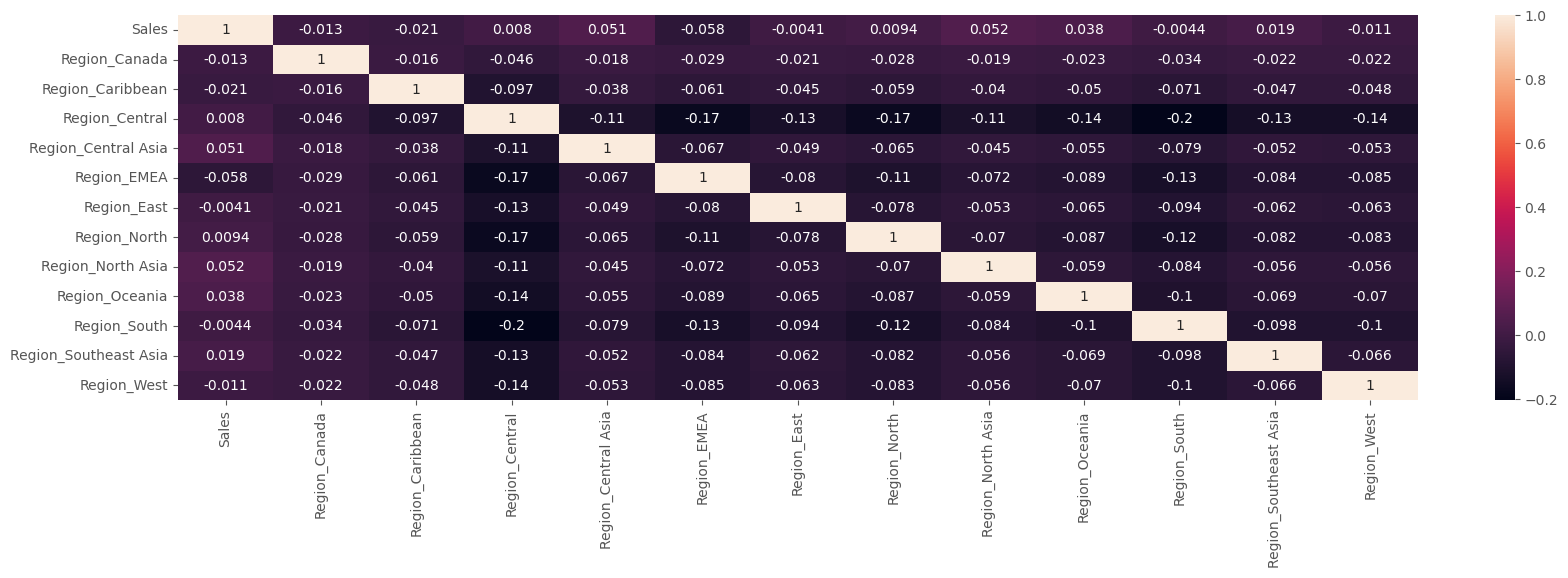

In [371]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

In [372]:
df.Market.unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [373]:
df3 = pd.get_dummies(df[['Market', 'Sales']],drop_first=True)
df3.head()

,Sales,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,408.300,True,False,False,False,False,False
1,120.366,False,False,False,False,False,False
2,66.120,False,False,True,False,False,False
3,44.865,False,False,False,True,False,False
4,113.670,False,False,False,False,False,False


<Axes: >

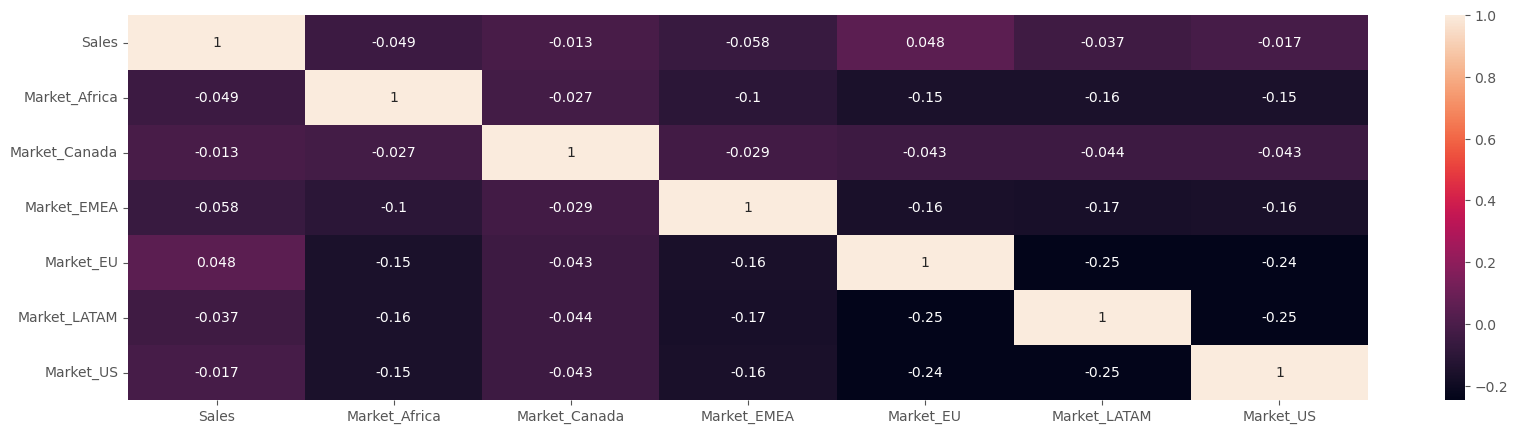

In [374]:
plt.figure(figsize=(20,5))
sns.heatmap(df3.corr(),annot=True)

In [375]:
df.Category.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [376]:
df4 = pd.get_dummies(df[['Category', 'Sales']],drop_first=True)
df4.head()

,Sales,Category_Office Supplies,Category_Technology
0,408.300,True,False
1,120.366,True,False
2,66.120,True,False
3,44.865,True,False
4,113.670,False,False


<Axes: >

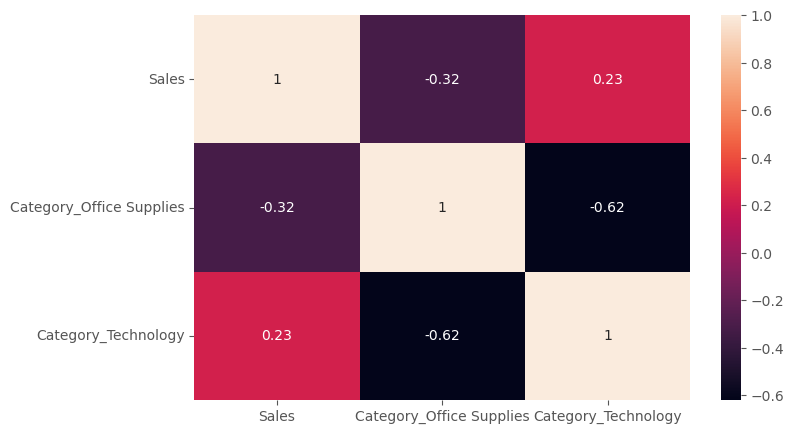

In [377]:
plt.figure(figsize=(8,5))
sns.heatmap(df4.corr(),annot=True)

In [378]:
df['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [379]:
df5 = pd.get_dummies(df[['Sub-Category', 'Sales']],drop_first=True)
df5.head()

,Sales,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,408.300,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,120.366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,66.120,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,44.865,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,113.670,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


<Axes: >

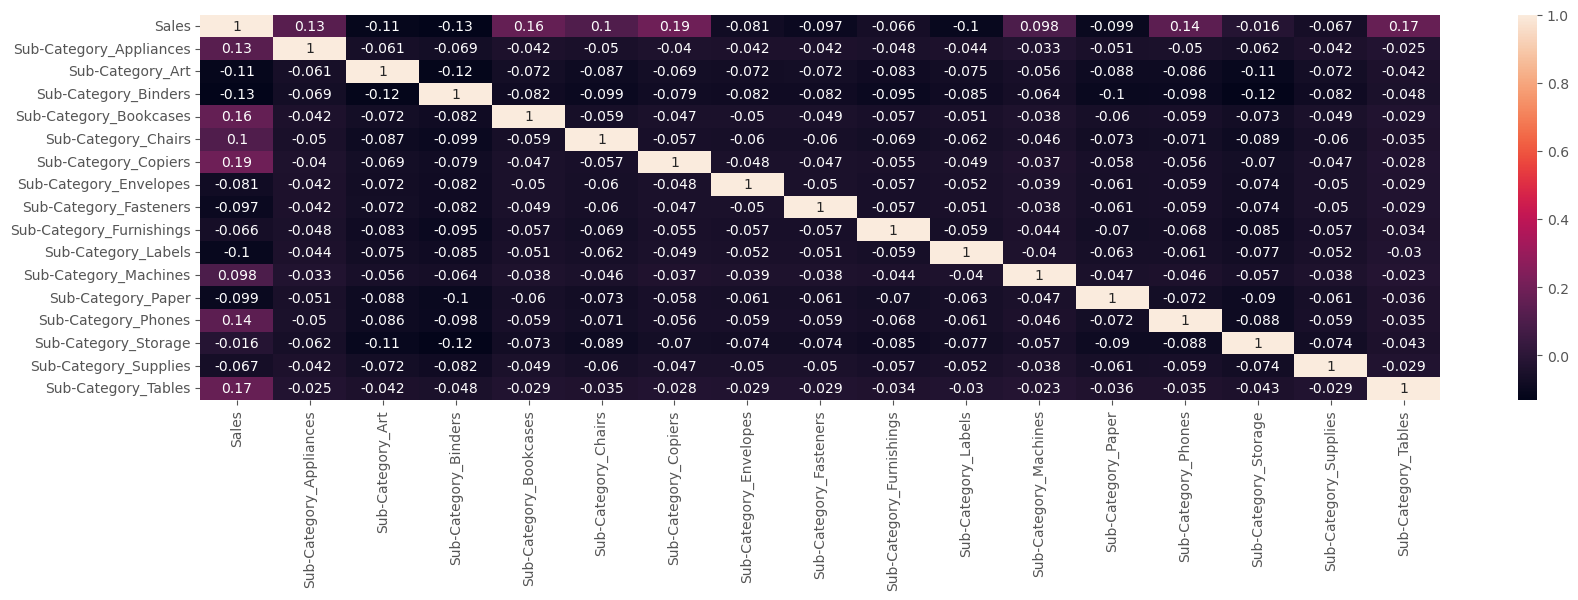

In [380]:
plt.figure(figsize=(20,5))
sns.heatmap(df5.corr(),annot=True)

In [381]:
df.drop(['Customer Name', 'City','State','Country','Market','Region','Product Name'],axis=1,inplace=True)

In [382]:
df.drop(['Order Date', 'Ship Date'],axis=1,inplace=True)

In [383]:
df.head()

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300,2011
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366,2011
2,Consumer,Office Supplies,Storage,4,0.0,29.640,8.17,High,66.120,2011
3,Home Office,Office Supplies,Paper,3,0.5,-26.055,4.82,High,44.865,2011
4,Consumer,Furniture,Furnishings,5,0.1,37.770,4.70,Medium,113.670,2011


**Calculer le Z score pour valider si les valeurs aberrantes sont toujours présentes ou pas**

In [384]:
df.isnull().sum()

Segment           0
Category          0
Sub-Category      0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Sales             0
year              0
dtype: int64

In [385]:
df.describe()

,Quantity,Discount,Profit,Shipping Cost,Sales,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.610982,26.375915,246.490581,2012.777208
std,2.278766,0.212280,174.340972,57.296804,487.565361,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,0.444000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,30.758625,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,85.053000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,251.053200,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,22638.480000,2014.000000


**Quantity feature**

<Axes: xlabel='Quantity'>

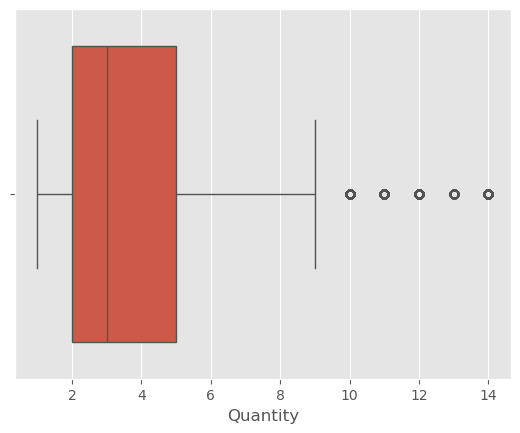

In [386]:
sns.boxplot(x='Quantity', orient ='v', data=df)

Ici, on ne supprime pas les valeurs aberrantes... A cause des remises, la quantité de produits vendus est différentes de l'habituel

**Discount fetaure**

<Axes: xlabel='Discount'>

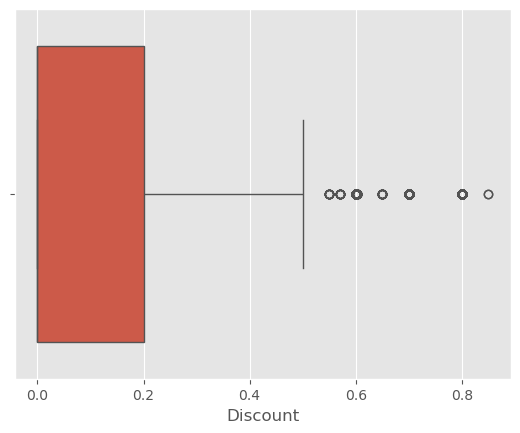

In [387]:
sns.boxplot(x='Discount',orient='v', data=df)

(array([2.962e+04, 4.609e+03, 5.972e+03, 7.550e+02, 3.477e+03, 2.685e+03,
        2.200e+01, 2.046e+03, 1.786e+03, 3.180e+02]),
 array([0.   , 0.085, 0.17 , 0.255, 0.34 , 0.425, 0.51 , 0.595, 0.68 ,
        0.765, 0.85 ]),
 <BarContainer object of 10 artists>)

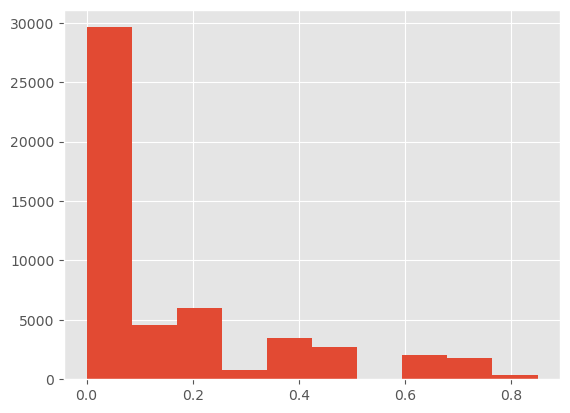

In [388]:
plt.hist(x='Discount',data=df,bins=10)

Pareil ici, on ades remises qui dépassent parfois les 50%. On va pas les considérer comme valeurs aberrantes

**Profit feature**

<Axes: xlabel='Profit'>

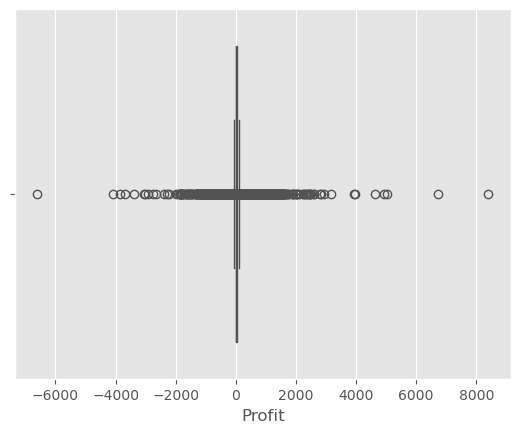

In [389]:
sns.boxplot(x='Profit',orient='v',data=df)

(array([1.0000e+00, 3.0000e+00, 9.0000e+00, 1.9400e+02, 5.0888e+04,
        1.7700e+02, 1.1000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-6599.978 , -5099.9826, -3599.9872, -2099.9918,  -599.9964,
          899.999 ,  2399.9944,  3899.9898,  5399.9852,  6899.9806,
         8399.976 ]),
 <BarContainer object of 10 artists>)

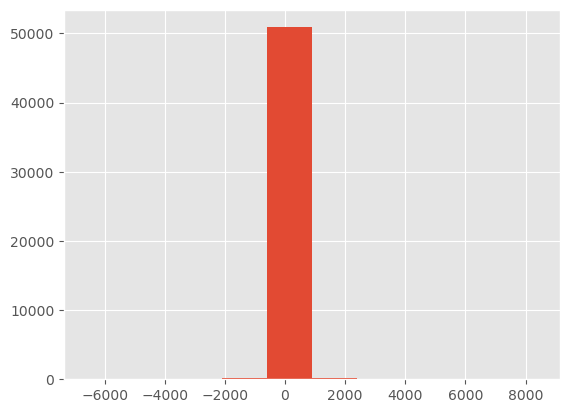

In [390]:
plt.hist(x='Profit',data=df,bins=10)

In [391]:
df[df.Profit>3000]

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
8898,Corporate,Technology,Copiers,5,0.0,8399.9760,349.07,Medium,17499.950,2013
17421,Corporate,Office Supplies,Appliances,14,0.0,3979.0800,778.32,Low,7958.580,2014
25346,Consumer,Office Supplies,Binders,5,0.0,3177.4750,581.12,Medium,6354.950,2012
29946,Consumer,Technology,Copiers,3,0.0,5039.9856,363.19,Medium,10499.970,2014
30124,Consumer,Office Supplies,Binders,13,0.0,4946.3700,498.70,Medium,9892.740,2013
37929,Consumer,Office Supplies,Binders,5,0.0,4630.4755,655.61,Medium,9449.950,2011
38234,Home Office,Technology,Copiers,4,0.2,3919.9888,45.98,High,11199.968,2014
38848,Consumer,Technology,Copiers,4,0.0,6719.9808,20.00,Medium,13999.960,2014


On a une valeur aberrante à partir de 4000.

In [392]:
profit_out = [8898, 29946,30124,37929,38848]

In [393]:
df.drop(profit_out,inplace=True)
df[df.Profit>3000]

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
17421,Corporate,Office Supplies,Appliances,14,0.0,3979.0800,778.32,Low,7958.580,2014
25346,Consumer,Office Supplies,Binders,5,0.0,3177.4750,581.12,Medium,6354.950,2012
38234,Home Office,Technology,Copiers,4,0.2,3919.9888,45.98,High,11199.968,2014


<Axes: xlabel='Profit', ylabel='Sales'>

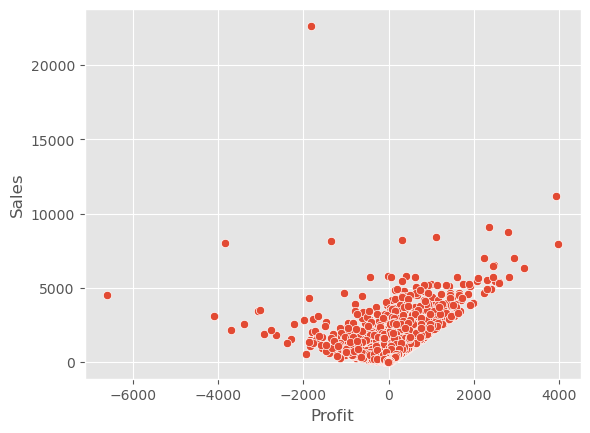

In [394]:
sns.scatterplot(x='Profit',y='Sales',data=df)

On remplace les valeurs aberrantes (côté 'Profit' négatif <= par exemple à -1200) par une limite inférieur (Q1 - 1.5 * IQR)

In [395]:
Q1 = df['Profit'].quantile(q=0.25)
Q3 = df['Profit'].quantile(q=0.75)
IQR = Q3-Q1
print('IQR = ', IQR)
limit_sup = Q3+(1.5*IQR)
limit_inf= Q1-(1.5*IQR)
print('Limit Sup = ', limit_sup)
print('Limit Inf = ', limit_inf)

IQR =  36.8
Limit Sup =  92.0
Limit Inf =  -55.199999999999996


In [396]:
df['Profit']=np.where(df['Profit']<= -1200, -55.199999999999996,df['Profit'])
df.head()

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300,2011
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366,2011
2,Consumer,Office Supplies,Storage,4,0.0,29.640,8.17,High,66.120,2011
3,Home Office,Office Supplies,Paper,3,0.5,-26.055,4.82,High,44.865,2011
4,Consumer,Furniture,Furnishings,5,0.1,37.770,4.70,Medium,113.670,2011


<Axes: xlabel='Profit', ylabel='Sales'>

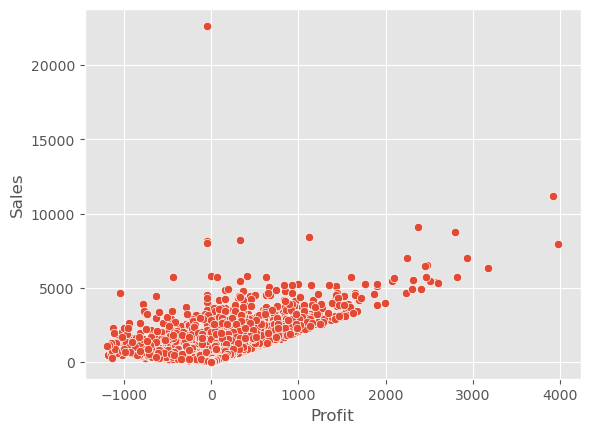

In [397]:
sns.scatterplot(x='Profit',y='Sales',data=df)

**Shipping Cost feature**

<Axes: xlabel='Shipping Cost'>

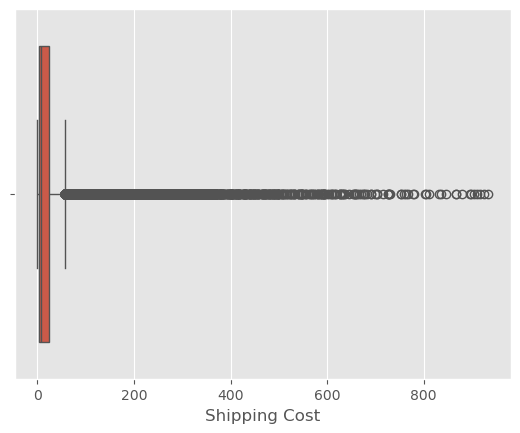

In [398]:
sns.boxplot(x='Shipping Cost', orient='v',data=df)

(array([4.8022e+04, 2.1080e+03, 6.1500e+02, 2.7400e+02, 1.1100e+02,
        7.0000e+01, 4.0000e+01, 2.2000e+01, 1.2000e+01, 1.1000e+01]),
 array([  0.   ,  93.357, 186.714, 280.071, 373.428, 466.785, 560.142,
        653.499, 746.856, 840.213, 933.57 ]),
 <BarContainer object of 10 artists>)

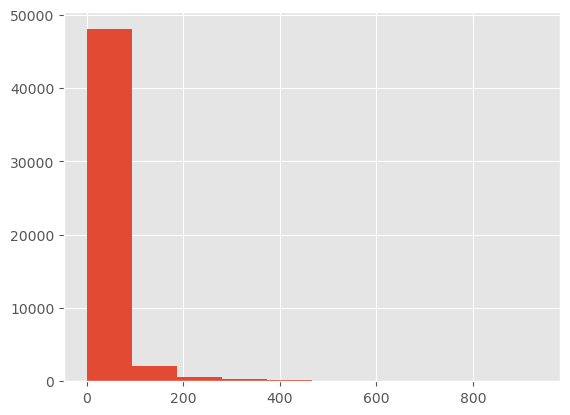

In [399]:
plt.hist(x='Shipping Cost',data=df, bins=10)

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

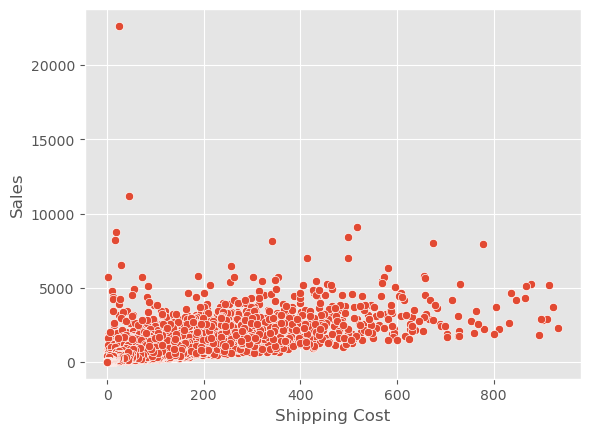

In [400]:
sns.scatterplot(x='Shipping Cost',y='Sales',data=df)

In [401]:
df[df['Shipping Cost']>300].head(20)

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
305,Consumer,Furniture,Chairs,8,0.00,673.8816,487.15,High,2807.8400,2011
415,Corporate,Furniture,Chairs,6,0.00,358.0200,752.47,Critical,2754.0000,2011
700,Corporate,Technology,Machines,10,0.00,258.9000,301.73,High,1619.1000,2011
775,Consumer,Furniture,Tables,1,0.00,384.8100,325.04,Critical,855.1500,2011
912,Corporate,Office Supplies,Appliances,5,0.10,561.4800,689.80,Critical,2526.9300,2011
913,Consumer,Office Supplies,Appliances,7,0.50,-55.2000,473.27,High,1983.1350,2011
914,Corporate,Furniture,Chairs,6,0.10,621.7920,366.89,Critical,2544.3720,2011
1285,Corporate,Office Supplies,Supplies,5,0.00,83.2810,846.54,High,4164.0500,2011
1444,Consumer,Technology,Phones,8,0.15,1517.7120,527.85,High,4448.8320,2011
1521,Home Office,Office Supplies,Storage,8,0.10,-50.9760,345.81,High,1523.6640,2011


Les frais de port sont généralement élevés pour les ordres de priorité élevé et critique. On ne fait pas de traitement 

**Sales feature**

<Axes: xlabel='Sales'>

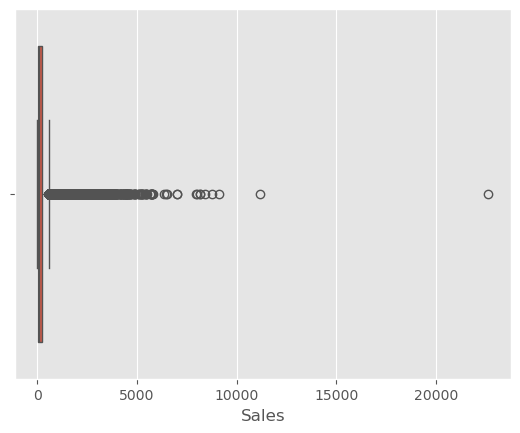

In [402]:
sns.boxplot(x='Sales',orient='v',data=df)

In [403]:
df[df.Sales>8000]

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
2255,Consumer,Technology,Machines,8,0.4,-55.2000,342.11,Medium,8159.952,2011
8209,Consumer,Technology,Machines,5,0.0,2799.9840,17.83,Critical,8749.950,2013
27043,Corporate,Technology,Machines,7,0.0,2365.9818,516.91,Medium,9099.930,2013
28612,Home Office,Technology,Machines,6,0.5,-55.2000,24.29,Medium,22638.480,2011
38234,Home Office,Technology,Copiers,4,0.2,3919.9888,45.98,High,11199.968,2014
39039,Consumer,Technology,Copiers,4,0.4,1119.9968,498.08,Medium,8399.976,2013
41049,Consumer,Office Supplies,Supplies,5,0.0,327.5060,16.77,High,8187.650,2011


On a des ventes de plus de 8000 car il s'agit des machines vendues à ces prix. on fait pas de traitement 

Créer une copie du dataframe

In [404]:
dataset = df.copy()
dataset.head()

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales,year
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300,2011
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366,2011
2,Consumer,Office Supplies,Storage,4,0.0,29.640,8.17,High,66.120,2011
3,Home Office,Office Supplies,Paper,3,0.5,-26.055,4.82,High,44.865,2011
4,Consumer,Furniture,Furnishings,5,0.1,37.770,4.70,Medium,113.670,2011


In [405]:
dataset.columns.values

array(['Segment', 'Category', 'Sub-Category', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Sales', 'year'],
      dtype=object)

In [406]:
from scipy import stats
z = np.abs(stats.zscore(dataset[['Quantity', 'Discount','Profit', 'Shipping Cost', 'Sales']]))
print(z)

       Quantity  Discount    Profit  Shipping Cost     Sales
0      0.647941  0.673258  0.517158       0.159532  0.345343
1      0.209046  0.202189  0.040813       0.290810  0.264763
2      0.229850  0.673258  0.002646       0.317929  0.379705
3      0.209046  1.682083  0.381084       0.376540  0.424743
4      0.668746  0.202189  0.052596       0.378639  0.278951
...         ...       ...       ...            ...       ...
51285  0.647941  0.268879  0.173340       0.445298  0.490346
51286  1.086837  0.673258  0.201191       0.452297  0.511353
51287  0.209046  0.673258  0.120061       0.454746  0.463868
51288  1.086837  0.673258  0.200240       0.457371  0.504721
51289  0.209046  0.268879  0.208154       0.457895  0.513400

[51285 rows x 5 columns]


In [407]:
threshold = 3
print(np.where(z>3))

(array([   61,   101,   103, ..., 51224, 51226, 51253]), array([0, 3, 2, ..., 3, 2, 0]))


In [408]:
dataset.shape

(51285, 10)

In [409]:
dataset_1 = dataset[(z<3).all(axis=1)]

In [410]:
dataset_1.shape

(48512, 10)

**On a créé deux DataFrame**

* Un pour connaître l'impact d'un plus grand nombre de produits vendus, noté [df]
* Un second optimisé avec un seuil de abs(zscore)<=3, noté [dataset_1] 

## 3. Modélisation

In [411]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Quantity,Discount,Profit,Shipping Cost,Sales,year,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,408.300,2011,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,3,0.1,36.036,9.72,120.366,2011,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,4,0.0,29.640,8.17,66.120,2011,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,3,0.5,-26.055,4.82,44.865,2011,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,5,0.1,37.770,4.70,113.670,2011,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [412]:
X = df.drop('Sales',axis=1)
y = df['Sales']
y

0        408.300
1        120.366
2         66.120
3         44.865
4        113.670
          ...   
51285     13.904
51286      3.990
51287     26.400
51288      7.120
51289      3.024
Name: Sales, Length: 51285, dtype: float64

In [413]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [414]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [415]:
y_pred = lr.predict(X_test)

In [416]:
print(y_test[0:20])
print(y_pred[0:20])

21064     717.7200
36248     573.1740
76        496.5840
45860     141.6000
10389     208.1100
48755     286.4400
17525     128.7440
41914      13.7376
3686       65.3400
19461      33.5160
48380     360.0000
22353      38.8944
9083      563.4300
41479     437.8500
38795      75.8400
22736      92.1200
15357      43.5000
5436       63.5200
19213    1094.2200
906         4.9280
Name: Sales, dtype: float64
[719.8649133  570.6421884  558.44120359 135.38027314 377.34109689
 376.49068556 354.5406615    6.57456925 261.22545     62.62164515
 424.42546768 -19.10166582 265.57040374 375.42530141  31.32680341
 221.37718319  71.3607054  198.73105193 956.14412458 -53.26509948]


In [417]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
mse

48144.91822332411

In [418]:
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mae

107.84686765262292

In [419]:
import math
rmse = math.sqrt(mse)
rmse

219.41950283264273

In [420]:
def mean_absolute_percentage_error(y_true,y_predict):
    y_true, y_predict = np.array(y_true),np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict)/y_true))*100

In [421]:
mean_absolute_percentage_error(y_test,y_pred)

176.55579299952686

In [422]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7805070207953227

In [423]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X=X_train,y=y_train,cv=10)
print('Accuracies : {:.2f}%'.format(accuracies.mean()*100))
print('std : {:.2f}%'.format(accuracies.std()*100))

Accuracies : 72.44%
std : 7.82%


**On va utiliser dataset_1**

In [424]:
dataset_1=pd.get_dummies(dataset_1,drop_first=True)

In [425]:
p = dataset_1.drop('Sales',axis=1)
q = dataset_1['Sales']

In [426]:
p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=0.3,random_state=0)

In [427]:
lr.fit(p_train,q_train)

LinearRegression()

In [428]:
q_pred =lr.predict(p_test)

In [429]:
mse = sklearn.metrics.mean_squared_error(q_test,q_pred)
mse

13903.193874165832

In [430]:
mae = sklearn.metrics.mean_absolute_error(q_test,q_pred)
mae

68.77795920835237

In [431]:
rmse = math.sqrt(mse)
rmse

117.91180549107808

In [432]:
mean_absolute_percentage_error(q_test,q_pred)

117.59237064497535

In [433]:
r2_score(q_test,q_pred)

0.7726382855410384

In [434]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X=p_train,y=q_train,cv=10)
print('Accuracies : {:.2f}%'.format(accuracies.mean()*100))
print('std : {:.2f}%'.format(accuracies.std()*100))

Accuracies : 77.19%
std : 0.60%
